Explanatory Video Link:https://drive.google.com/drive/folders/1KToMB7mmdp_qeIqZd1pLdSi1lK8N-ebf?usp=sharing

Photo's Folder Link:https://drive.google.com/drive/folders/1KToMB7mmdp_qeIqZd1pLdSi1lK8N-ebf?usp=sharing

### MaxHeap Python Implementation

In [4]:
from typing import List, Optional, Dict
import matplotlib.pyplot as plt
import networkx as nx

class MaxHeapq:
    """
    Custom implementation of a Max Heap using an array to store Task objects.
    Provides efficient priority-based management for tasks.
    """

    def __init__(self):
        """
        Initializes an empty MaxHeapq.
        """
        self.heap: List[Task] = []

    def left(self, i: int) -> int:
        """
        Returns the index of the left child of the node at index i.

        Args:
            i (int): Index of the node.

        Returns:
            int: Index of the left child.
        """
        return 2 * i + 1

    def right(self, i: int) -> int:
        """
        Returns the index of the right child of the node at index i.

        Args:
            i (int): Index of the node.

        Returns:
            int: Index of the right child.
        """
        return 2 * i + 2

    def parent(self, i: int) -> int:
        """
        Returns the index of the parent of the node at index i.

        Args:
            i (int): Index of the node.

        Returns:
            int: Index of the parent node.
        """
        return (i - 1) // 2

    def heappush(self, task: 'Task'):
        """
        Inserts a new Task into the heap and maintains the max heap property.

        Args:
            task (Task): The Task to insert into the heap.
        """
        self.heap.append(task)
        idx = len(self.heap) - 1
        while idx > 0 and self.heap[self.parent(idx)] < self.heap[idx]:
            # Swap the current node with its parent to move up the heap
            self.heap[idx], self.heap[self.parent(idx)] = self.heap[self.parent(idx)], self.heap[idx]
            idx = self.parent(idx)

    def heapify(self, i: int):
        """
        Ensures the max heap property by adjusting nodes downward from index i.
        
        Args:
            i (int): Index from which to start heapifying downward.
        """
        largest = i  
        left = self.left(i)  
        right = self.right(i)
        
        # Compare the current node with its left child (if within bounds)
        if left < len(self.heap) and self.heap[left] > self.heap[largest]:
            largest = left
        
        # Compare the current largest node with the right child (if within bounds)
        if right < len(self.heap) and self.heap[right] > self.heap[largest]:
            largest = right
        
        # If the largest node is not the current node, swap and continue heapifying
        if largest != i:
            # Swap the current node with the largest child
            self.heap[i], self.heap[largest] = self.heap[largest], self.heap[i]
            # Recursively heapify the affected subtree
            self.heapify(largest)
            
    def heappop(self) -> Optional['Task']:
        """
        Removes and returns the Task with the highest priority from the heap.
    
        Returns:
            Optional[Task]: The Task with the highest priority, or None if the heap is empty.
        """
        if not self.heap:
            return None
        if len(self.heap) == 1:
            # If there is only one element, simply pop and return it
            return self.heap.pop()
        
        root = self.heap[0]
        # Move the last element to the root
        self.heap[0] = self.heap.pop()
        # Restore max heap property
        self.heapify(0)
        return root

    def __len__(self):
        """
        Returns the number of elements in the heap.

        Returns:
            int: Number of elements in the heap.
        """
        return len(self.heap)
    
    def clear(self):
        """
        Clears all elements from the heap.
        """
        self.heap = []

    def plot_heap(self, caption: str):
        """
        Plots the heap structure using a tree diagram for visualization
        and adds a caption below the graph explaining the test case.
        
        Args:
            caption (str): Description of the test case to display below the plot.
        """
        if not self.heap:
            print("Heap is empty")
            return

        # Create a directed graph of the heap
        G = nx.DiGraph()

        # Add nodes and edges based on binary heap structure
        for i in range(len(self.heap)):
            G.add_node(i, label=self.heap[i])
            left = self.left(i)
            right = self.right(i)
            if left < len(self.heap):
                G.add_edge(i, left)
            if right < len(self.heap):
                G.add_edge(i, right)

        pos = nx.spring_layout(G)  # Position nodes for visualization
        labels = nx.get_node_attributes(G, 'label')

        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, font_size=12)
        plt.title("Max Heap Structure")
        plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=10)
        plt.show()


### Testing The MaxHeapq Class

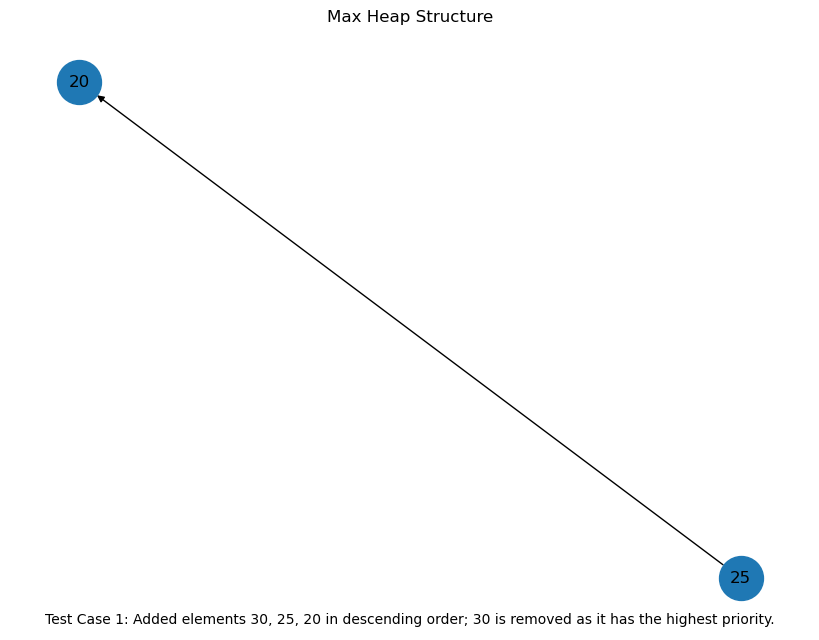

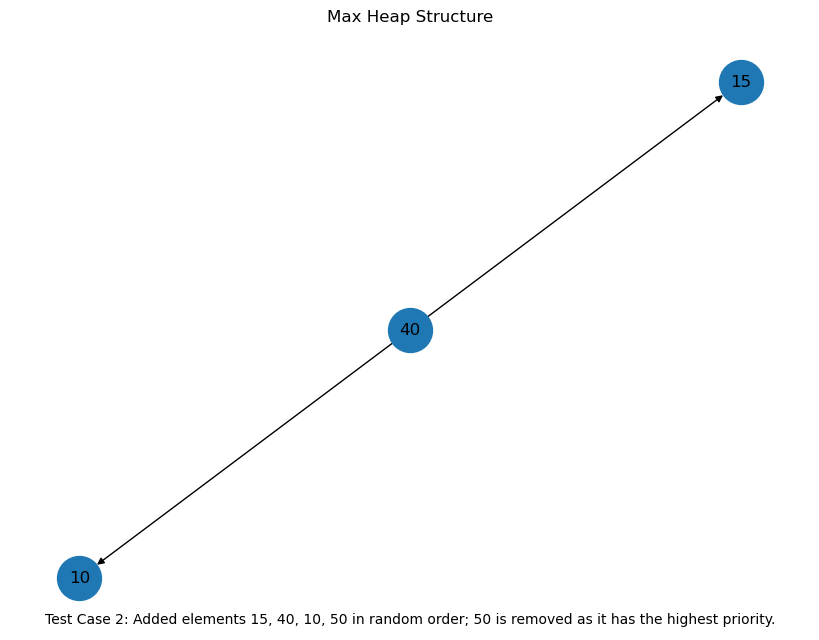

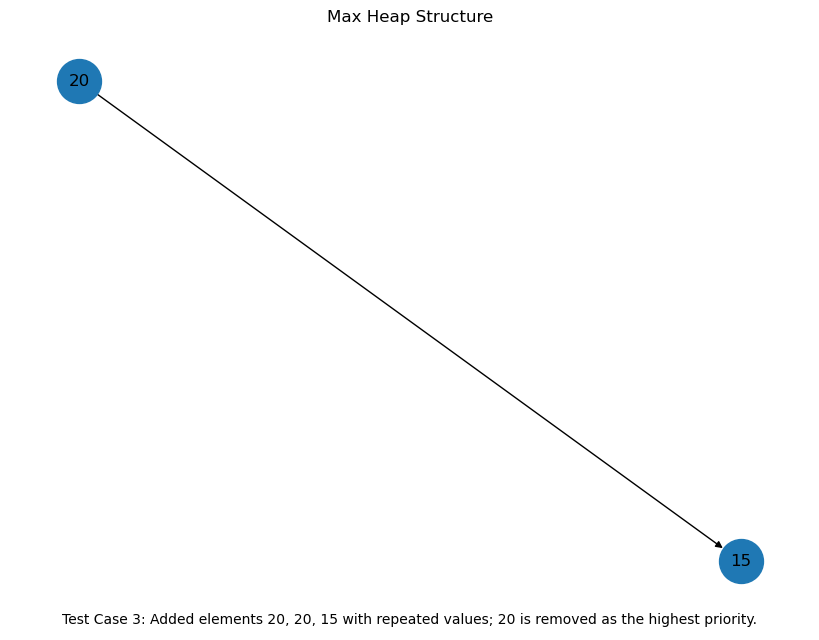

Heap is empty
Heap is empty
All test cases passed!


In [284]:
# Initialize the heap only once
max_heap = MaxHeapq()

# Test Case 1: Adding elements in descending order and checking max
max_heap.clear()  # Clear any prior elements
max_heap.heappush(30)
max_heap.heappush(25)
max_heap.heappush(20)
assert max_heap.heappop() == 30, "Test Case 1 Failed: Expected 30"
max_heap.plot_heap("Test Case 1: Added elements 30, 25, 20 in descending order; 30 is removed as it has the highest priority.")

# Test Case 2: Adding elements in random order and checking max
max_heap.clear()  # Clear any prior elements
max_heap.heappush(15)
max_heap.heappush(40)
max_heap.heappush(10)
max_heap.heappush(50)
assert max_heap.heappop() == 50, "Test Case 2 Failed: Expected 50"
max_heap.plot_heap("Test Case 2: Added elements 15, 40, 10, 50 in random order; 50 is removed as it has the highest priority.")

# Test Case 3: Repeated values
max_heap.clear()  # Clear any prior elements
max_heap.heappush(20)
max_heap.heappush(20)
max_heap.heappush(15)
assert max_heap.heappop() == 20, "Test Case 3 Failed: Expected 20"
max_heap.plot_heap("Test Case 3: Added elements 20, 20, 15 with repeated values; 20 is removed as the highest priority.")

# Test Case 4: Edge case with a single element
max_heap.clear()  # Clear any prior elements
max_heap.heappush(5)
assert max_heap.heappop() == 5, "Test Case 4 Failed: Expected 5"
assert len(max_heap) == 0, "Test Case 4 Failed: Expected heap length of 0 after popping last element"
max_heap.plot_heap("Test Case 4: Added a single element 5; after removal, heap is empty.")

# Test Case 5: Mixed operations of push and pop
max_heap.clear()  # Clear any prior elements
max_heap.heappush(60)
max_heap.heappush(45)
assert max_heap.heappop() == 60, "Test Case 5 Failed: Expected 60"
max_heap.heappush(35)
assert max_heap.heappop() == 45, "Test Case 5 Failed: Expected 45"
assert max_heap.heappop() == 35, "Test Case 5 Failed: Expected 35"
assert len(max_heap) == 0, "Test Case 5 Failed: Expected heap length of 0"
max_heap.plot_heap("Test Case 5: Mixed operations - Added 60, 45, 35; elements removed in order of priority.")

print("All test cases passed!")


### Heaps Vs Arrays Vs Linked Lists

- **Heaps** are specialized tree-based structures that satisfy the **heap property**. In a **MaxHeap**, the parent node is always greater than or equal to its children, ensuring that the largest element is always at the root. Conversely, a **MinHeap** has the smallest element at the root.
- **Arrays (or lists)** are linear data structures where elements are stored sequentially, without any inherent ordering or hierarchy. An array can store any sequence of elements, but retrieving, inserting, or removing elements in a specific order is less efficient without additional processing.
- **Linked Lists** are linear data structures where each element (node) points to the next. In a **singly linked list**, each node has a single pointer to the next node, while in a **doubly linked list**, each node has pointers to both the previous and next nodes. Linked lists do not require contiguous memory and allow efficient insertion and deletion at arbitrary positions but lack direct access by index.

### Runtime Complexity Comparison

1. **Insertion**:
   - **Heap**: Inserting an element in a heap has a time complexity of **$O(\log n)$**, as it requires placing the element in the correct spot to maintain the heap property.
   - **Array/List**: Inserting an element into an unsorted array takes **$O(1)$** (append operation), but if the array is sorted, insertion takes **$O(n)$** because elements must be shifted to maintain order.
   - **Linked List**: Inserting at the beginning or end of a linked list takes **$O(1)$** for both singly and doubly linked lists, as no shifting is required. However, inserting at an arbitrary position takes **$O(n)** due to the need to traverse the list to reach that position.

2. **Retrieval of the Top Element**:
   - **Heap**: Accessing the maximum (or minimum) element in a heap is **$O(1)$**, as it is always at the root.
   - **Array/List**: If the array is unsorted, retrieving the maximum or minimum element takes **$O(n)$**. If the array is sorted, retrieval of the top element is **$O(1)$**, but maintaining this order requires additional work.
   - **Linked List**: Retrieving the maximum or minimum element is **$O(n)$** for an unsorted linked list, as it requires traversing the entire list.

3. **Removal of the Top Element**:
   - **Heap**: Removing the top element (root) in a heap takes **$O(\log n)$**, as the structure must be rebalanced to maintain the heap property.
   - **Array/List**: Removing the highest priority element from an unsorted array takes **$O(n)$** (due to searching for the element first). For a sorted array, removal takes **$O(n)$** as elements need to be shifted.
   - **Linked List**: Removing the first element in a singly linked list takes **$O(1)$**, while removing an arbitrary element or the last element requires **$O(n)$** traversal.

### Theoretical Performance Comparison Under Different Scenarios

1. **Small Input Sizes**
   - **Array**: Performs well for small datasets with simple operations, as it offers $O(1)$ insertion (unsorted) and retrieval without much overhead.
     - **Best Choice**: When the dataset is small and there’s no need for complex priority management.
   - **Heap**: Handles small inputs efficiently with $O(\log n)$ insertion and removal, though the heap structure’s advantages are less prominent due to low element count.
     - **Good Choice**: When priority-based retrieval is still required but performance benefits aren’t significant for small inputs.
   - **Linked List**: Performs adequately if insertions and deletions are at the beginning or end but suffers for priority-based retrievals due to $O(n)$ complexity.
     - **Acceptable Choice**: For simple insertion/deletion tasks but not ideal for priority-driven access.

2. **Medium Input Sizes**
   - **Heap**: Scales well as input size grows, maintaining $O(\log n)$ insertion and removal. With moderate tasks, the priority-based advantages start to become noticeable.
     - **Best Choice**: For managing priorities with moderate input sizes, as it balances efficiency with manageable overhead.
   - **Array**: Begins to show limitations if kept sorted, as $O(n)$ operations for insertion and deletion become more costly with increasing size.
     - **Fair Choice**: If the input is mostly static or unsorted, but limited for priority management.
   - **Linked List**: Starts to struggle with retrieval and priority-based access due to $O(n)$ complexity, especially as the dataset grows.
     - **Poor Choice**: As it requires full traversal for priority access and lacks indexing benefits.

3. **Large Input Sizes**
   - **Heap**: Clearly excels with large datasets due to $O(\log n)$ insertion and removal, making it ideal for priority-based access under high load.
     - **Best Choice**: When managing a large number of tasks with frequent priority-based operations.
   - **Array**: Becomes inefficient for priority management as $O(n)$ operations for insertion, removal, and retrieval impose significant delays.
     - **Poor Choice**: Limited to cases where random access or simple list processing is needed, not suited for priority-based scheduling.
   - **Linked List**: Suffers significantly in large datasets due to $O(n)$ retrieval and reordering operations, especially if priority-based access is required.
     - **Worst Choice**: For priority scheduling and handling large datasets.

4. **Random Priority Tasks**
   - **Heap**: Efficiently manages random insertions and retrievals, maintaining $O(\log n)$ for each operation, even with priority changes.
     - **Best Choice**: When tasks have random priorities and frequent adjustments are necessary.
   - **Array**: Performs poorly if kept sorted, as random insertions require $O(n)$ shifts to maintain order.
     - **Poor Choice**: If order must be maintained; better if unsorted, but not ideal for priority-based access.
   - **Linked List**: Has difficulty with random priorities since it requires $O(n)$ traversal to find high-priority tasks.
     - **Poor Choice**: For random priority tasks, as it’s slow for retrieval based on priority.

5. **High-Frequency Priority Updates**
   - **Heap**: Handles frequent priority updates efficiently with $O(\log n)$ reordering, minimizing reordering overhead.
     - **Best Choice**: For scenarios requiring frequent priority changes and dynamic task management.
   - **Array**: Extremely inefficient if sorted, as each priority update requires $O(n)$ shifting to maintain order.
     - **Worst Choice**: For sorted arrays with high-frequency updates; better suited for static, unchanging data.
   - **Linked List**: Struggles with priority updates due to $O(n)$ traversal and reordering.
     - **Poor Choice**: For frequently updated priorities; lacks both random access and efficient reordering.

6. **Highly Ordered Tasks (Nearly Sorted by Priority)**
   - **Array**: Performs relatively well if kept sorted, as fewer elements need shifting. Insertion and removal times can be reduced due to near-order.
     - **Best Choice**: If priority-based access is needed and tasks are already nearly sorted.
   - **Heap**: Maintains $O(\log n)$ operations, though its efficiency advantage over sorted arrays diminishes in nearly sorted scenarios.
     - **Good Choice**: If priority-based retrieval is necessary, but not significantly better than a sorted array for this specific case.
   - **Linked List**: Still requires $O(n)$ retrieval, making it less efficient even with sorted input.
     - **Poor Choice**: For priority-based access in nearly sorted scenarios; lacks benefits of arrays or heaps.

7. **Large Batch Insertions and Removals**
   - **Heap**: Efficiently handles bulk operations with $O(n \log n)$ complexity for multiple insertions or deletions.
     - **Best Choice**: For bulk operations where priority-based retrieval is still needed after insertion.
   - **Array**: Struggles with maintaining order during bulk insertions and deletions, as each operation requires $O(n)$ shifts if sorted.
     - **Poor Choice**: For sorted arrays, bulk operations introduce significant delays; unsorted arrays may be acceptable if random access is needed but not priority-based access.
   - **Linked List**: Performs reasonably well with insertions at the start or end but poorly with priority-based deletions or retrievals.
     - **Fair Choice**: If bulk insertions and removals are required at specific ends of the list but not for priority-based retrieval.

---

### Summary of Best Choices by Scenario

| Scenario                         | Best Choice           | Reason                                                                                              |
|----------------------------------|------------------------|-----------------------------------------------------------------------------------------------------|
| **Small Input Sizes**            | Array                 | Minimal overhead with $O(1)$ insertion and no need for priority reordering.                         |
| **Medium Input Sizes**           | Heap                  | $O(\log n)$ insertion/removal; manages priority efficiently with moderate input.                    |
| **Large Input Sizes**            | Heap                  | $O(\log n)$ efficiency scales well with large datasets for priority-based access.                   |
| **Random Priority Tasks**        | Heap                  | $O(\log n)$ reordering; handles random insertions/retrievals efficiently.                           |
| **High-Frequency Priority Updates** | Heap              | $O(\log n)$ reordering with minimal overhead on priority adjustments.                               |
| **Highly Ordered Tasks**         | Array (if sorted)     | Near-order allows efficient retrieval with fewer shifts needed.                                     |
| **Large Batch Insertions/Removals** | Heap             | $O(n \log n)$ for batch operations; manages bulk insertions and deletions efficiently.              |

### When to Use Heaps vs. Arrays vs. Linked Lists

- **Heaps** are ideal for **priority queues** or situations where we need to frequently access, insert, or remove the highest (or lowest) priority element efficiently

- **Arrays** are more appropriate when:
  - The order of elements is not essential or when random access is needed, as arrays allow **$O(1)$** access by index.
  - The dataset is small, and we don’t need frequent priority-based retrieval, making the overhead of a heap unnecessary.
  
- **Linked Lists** are useful when:
  - Frequent insertions and deletions are required, especially at the beginning or end of the list.
  - Memory is fragmented, as linked lists do not require contiguous memory allocation.
  - Random access is not needed, as linked lists require **$O(n)$** traversal for element access by position.

### Empirical Analysis of the Runtime of Arrays Vs Heaps Vs Linked Lists under differnet conditions

In [18]:
import random
import time
import matplotlib.pyplot as plt
from bisect import insort

def measure_operations(data_structure, input_size, trials=1000):
    """
    Measures the time for inserting an element and deleting the largest element
    in a given data structure for a certain input size, repeated for a number of trials.
    Returns the average insertion time and deletion time.
    """
    insertion_times = []
    deletion_times = []
    
    for _ in range(trials):
        # Create a dataset with random integers
        data = [random.randint(1, 100000) for _ in range(input_size)]
        
        if data_structure == 'unsorted_array':
            # Measure insertion time for unsorted array (append at the end)
            start_insert = time.perf_counter()
            data.append(random.randint(1, 100000))  # Insertion at the end (O(1))
            end_insert = time.perf_counter()
            insertion_times.append(end_insert - start_insert)
            
            # Measure deletion time for the largest element in an unsorted array
            start_delete = time.perf_counter()
            max_value = max(data)  # Finding the largest element (O(n))
            data.remove(max_value) # Removing the largest element (O(n))
            end_delete = time.perf_counter()
            deletion_times.append(end_delete - start_delete)
        
        elif data_structure == 'sorted_array':
            # Ensure initial data is sorted for a sorted array
            data.sort()
            new_element = random.randint(1, 100000)
            
            # Measure insertion time for a sorted array
            start_insert = time.perf_counter()
            insort(data, new_element)  # Insertion while maintaining sorted order (O(n))
            end_insert = time.perf_counter()
            insertion_times.append(end_insert - start_insert)
            
            # Measure deletion time for the largest element in a sorted array
            start_delete = time.perf_counter()
            data.pop()  # Removing the largest element at the end (O(1))
            end_delete = time.perf_counter()
            deletion_times.append(end_delete - start_delete)
        
        elif data_structure == 'linked_list':
            # Using a python list to simulate a linked list
            # Inserting at the head is O(1)
            # Deleting the largest requires O(n) to find and remove
            start_insert = time.perf_counter()
            data.insert(0, random.randint(1, 100000))  # Insertion at the head (O(1))
            end_insert = time.perf_counter()
            insertion_times.append(end_insert - start_insert)
            
            # Measure deletion time for the largest element in a linked list
            start_delete = time.perf_counter()
            max_value = max(data)    # Finding the largest element (O(n))
            data.remove(max_value)   # Removing the largest element (O(n))
            end_delete = time.perf_counter()
            deletion_times.append(end_delete - start_delete)
        
        elif data_structure == 'heap':
            # Using your custom MaxHeapq class for a max heap
            # We'll initialize an empty heap, then insert the initial data
            heap_data = MaxHeapq()
            
            # Push the initial data onto the heap
            for val in data:
                heap_data.heappush(val)
            
            # Insert a new element and measure the time
            new_element = random.randint(1, 100000)
            
            start_insert = time.perf_counter()
            heap_data.heappush(new_element)  # Insert the new element (O(log n))
            end_insert = time.perf_counter()
            insertion_times.append(end_insert - start_insert)
            
            # Measure deletion time for the largest element in a heap
            start_delete = time.perf_counter()
            heap_data.heappop()  # Remove the largest element (O(log n))
            end_delete = time.perf_counter()
            deletion_times.append(end_delete - start_delete)
        
        else:
            raise ValueError("Unknown data structure.")
    
    average_insertion_time = sum(insertion_times) / trials
    average_deletion_time = sum(deletion_times) / trials
    return average_insertion_time, average_deletion_time

def measure_scaling(data_structures, input_sizes):
    """
    Measures the scaling of runtime for insertion and deleting the largest element 
    for different data structures across various input sizes.
    Returns a dictionary with results to be plotted.
    """
    results = {ds: {'input_sizes': [], 'insertion_times': [], 'deletion_times': []} for ds in data_structures}
    
    for ds in data_structures:
        for size in input_sizes:
            insertion_time, deletion_time = measure_operations(ds, size)
            results[ds]['input_sizes'].append(size)
            results[ds]['insertion_times'].append(insertion_time)
            results[ds]['deletion_times'].append(deletion_time)
    
    return results

def plot_scaling(results):
    """
    Plots the runtime scaling for insertion and deletion operations for each data structure.
    """
    plt.figure(figsize=(12, 6))
    data_structures = list(results.keys())
    
    # Plot insertion times
    plt.subplot(1, 2, 1)
    for ds in data_structures:
        plt.plot(results[ds]['input_sizes'], results[ds]['insertion_times'], marker='o', label=ds)
    plt.title('Insertion Time Complexity')
    plt.xlabel('Input Size')
    plt.ylabel('Average Time (seconds)')
    plt.yscale('log')  # log scale for better visualization
    plt.legend()
    plt.grid(True)
    
    # Plot deletion times
    plt.subplot(1, 2, 2)
    for ds in data_structures:
        plt.plot(results[ds]['input_sizes'], results[ds]['deletion_times'], marker='o', label=ds)
    plt.title('Deletion of Largest Element Time Complexity')
    plt.xlabel('Input Size')
    plt.ylabel('Average Time (seconds)')
    plt.yscale('log')  # log scale for better visualization
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


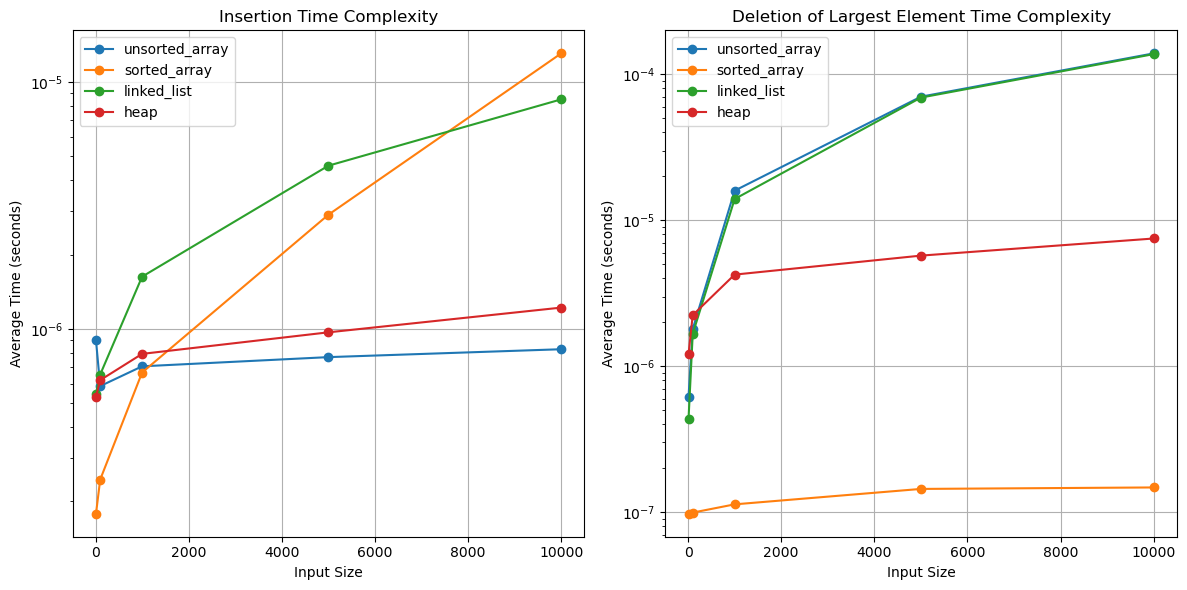

In [20]:
if __name__ == "__main__":
    data_structures = ['unsorted_array', 'sorted_array', 'linked_list', 'heap']
    input_sizes = [10, 100, 1000, 5000, 10000]
    
    results = measure_scaling(data_structures, input_sizes)
    plot_scaling(results)


## Graph Explanation

### Purpose of the Graph

This graph compares the performance of different data structures—heaps, arrays (both sorted and unsorted), and linked lists—based on the time it takes to perform two specific operations as the number of elements increases: **Insertion** and **Deletion of the Largest Element**. These operations are relevant for priority-based scheduling contexts, where we need efficient ways to add and retrieve tasks based on their priorities.

### Key Operations Measured

- **Heap Operations (Red Line)**: The graph tracks the performance of a MaxHeap for insertion, removal, and retrieval of the maximum element. Due to the nature of heaps, we expect them to scale efficiently, especially as the number of elements increases.

- **Array Operations**:
  - **Sorted Array (Orange Line)**: Insertion in a sorted array requires maintaining sorted order, which has a time complexity of $O(n)$, as it involves shifting elements. However, retrieving the maximum element is efficient at $O(1)$, as it is always at a known position.
  - **Unsorted Array (Blue Line)**: In an unsorted array, insertion (appending an element) is efficient at $O(1)$, but finding and removing the maximum element requires a linear scan of $O(n)$.

- **Linked List Operations (Green Line)**: For linked lists, the graph measures insertion (at the beginning or end) and retrieval of the maximum element. Insertion at the ends is $O(1)$, but finding the maximum requires a full traversal of $O(n)$.

The purpose of this graph is to illustrate how each data structure handles increasing input sizes for priority-driven operations, highlighting where they excel and where they struggle.

### Graph Analysis and Interpretation

1. **Heaps (Red Line)**
   - **Expected Performance**: Heaps perform efficiently with $O(\log n)$ complexity for insertion and removal, making them ideal for tasks requiring priority-based access, especially with larger datasets.
   - **Graph Interpretation**:
       - The red line for heap operations shows steady performance across increasing input sizes for both insertion and deletion. This indicates that heaps can manage larger datasets efficiently without a significant increase in operation time.
       - The stable performance in the graph confirms the theoretical analysis, underscoring that heaps are optimal for priority-driven scheduling where tasks are frequently added, reordered, and removed.

2. **Arrays (Blue and Orange Lines)**
   - **Sorted Array (Orange Line)**
     - **Expected Performance**: Sorted arrays are efficient for retrieving the top element at $O(1)$ but struggle with insertion at $O(n)$, especially as the dataset grows.
     - **Graph Interpretation**:
         - The orange line for insertion shows an increase in operation time as input size increases, reflecting the $O(n)$ cost of maintaining sorted order. Deletion performance remains relatively stable, indicating that retrieving the maximum in sorted arrays is efficient.
         - This pattern aligns with our theoretical assessment, suggesting that sorted arrays are best for static or nearly sorted datasets with minimal insertions or deletions.
   - **Unsorted Array (Blue Line)**
     - **Expected Performance**: Unsorted arrays offer $O(1)$ insertion but require $O(n)$ time for retrieving or removing the maximum element, which we expected to cause performance degradation as input size grows.
     - **Graph Interpretation**:
         - The blue line for deletion shows increased time with larger datasets, confirming that unsorted arrays become inefficient for priority-based tasks as input size grows.
         - This supports our theoretical conclusion that unsorted arrays are suitable for small or non-priority-focused datasets but struggle with dynamic priority management in larger data environments.

3. **Linked Lists (Green Line)**
   - **Expected Performance**: Linked lists perform well for insertions at the beginning or end $O(1)$ but poorly for priority-based retrievals, which require $O(n)$ traversal.
   - **Graph Interpretation**:
       - The green line shows that linked lists handle small datasets adequately but experience performance degradation as the dataset size increases, especially for deletion operations.
       - The increasing operation time with input size confirms our expectation that linked lists are inefficient for prioritized access in dynamic scenarios, validating our theoretical prediction that they lack scalability for large datasets with frequent priority changes.

---

### Comparison With Theoretical Analysis

The graph provides empirical validation for the theoretical performance expectations of each data structure:

- **Heaps**: The stable performance supports their suitability for large, dynamic datasets where priority-based operations are frequent.
- **Sorted Arrays**: Show efficiency for retrieval with minimal updates, making them suitable for smaller, nearly static datasets where priorities don’t change often.
- **Unsorted Arrays**: Show fluctuating and slower performance for deletion with larger inputs, demonstrating limitations in priority-based tasks for larger or dynamic data environments.
- **Linked Lists**: Experience rapid efficiency decline with larger datasets, confirming they are inadequate for priority-based access, especially in large datasets with frequent updates.


### Why I Chose a Heap in This Case

In the context of a **scheduler** where tasks are prioritized, a **MaxHeap** is the most appropriate choice for implementing a **priority queue**. Here’s why:

- **Efficient Priority Management**: The scheduler needs to manage tasks by priority, and a heap allows for efficient insertion, extraction, and retrieval of the top-priority task in **$O(\log n)$** time. Given that task priorities can change frequently, a heap enables these adjustments with minimal reordering overhead.
  
- **Constant Access to Highest Priority Task**: The most critical task is always at the root of a MaxHeap, allowing for **$O(1)$** access to the highest-priority task. This is essential for the scheduler to continuously pull the next task that should be executed, without scanning through a list to find it.

- **Dynamic Reordering**: Unlike an array, where reordering elements would require **$O(n)$** operations, a heap inherently maintains its structure with each insertion or removal, making it optimal for a scheduler where task priorities may be updated frequently.

### Why MaxHeap and Not MinHeap?

A MaxHeap specifically, rather than a MinHeap, is used in my algorithm to allow for quick access to the task with the highest priority at any given time, since my priority function assigns positive values to tasks, which are ordered ascendingly from the least important task (low positive value) to the most important (high positive value). By contrast, a MinHeap would prioritize tasks with the lowest scores, making it less suitable for my priority function.

### Additional Considerations for Using a Single Priority Queue

The choice to use a single MaxHeap rather than multiple queues was made to ensure holistic task management. All tasks, irrespective of type or specific attributes, are stored in a single queue. This centralization prevents inefficiencies that might arise from splitting tasks into multiple queues, where lower-priority tasks in one queue could potentially be processed before higher-priority tasks in another. By using a single MaxHeap, the scheduler maintains a unified view of all tasks' priorities, enabling a consistent and efficient scheduling process that takes all relevant factors into account simultaneously.


# High-Level Description of the Scheduler's Algorithmic Strategy


The scheduler’s algorithm is driven by a utility-based priority function that calculates a `priority_score` for each task. This score considers several factors: **Time Sensitivity**, **Task Type**, **Number of Dependencies**, **Deadline Awareness**, and **Task Duration**. The scheduler also adapts its prioritization based on whether the day is **busy** or **normal** in terms of academic and professional tasks, controlled by a `tight_time_deadlines` parameter.

## Detailed Explanation of Each Variable, Type, Weight, and Example

The utility function, calculated as `Utility Score = Base Priority + (W1 * Time Sensitivity) + (W2 * Task Type) + (W3 * Number of Dependencies)`, considers the following factors:

- **Time Sensitivity (W1 = 0.5)**
  - **Type**: Qualitative (Categorical)
  - **Explanation**: This variable reflects how strictly a task must adhere to specific times, with three levels of urgency:
    - **Fixed Time Task (9.0)**: Must be completed at a specific time (e.g., attending a 9:00 AM meeting).
    - **Period-Constrained Task (6.0)**: Must occur within a set time frame (e.g., having lunch between 12:00 PM and 2:00 PM).
    - **Free for All (3.0)**: Can be completed any time during the day (e.g., reading a book).
  - **Formula in Code**: `time_sensitivity_score = time_sensitivity_weights[self.time_sensitivity]`
  - **Justification**: Assigning a 0.5 weight reflects the high importance of scheduling tasks based on time sensitivity, especially for fixed-time tasks that cannot be rescheduled easily.

- **Task Type (W2 = 0.2)**
  - **Type**: Qualitative (Categorical)
  - **Explanation**: Task Type categorizes activities based on their purpose and relative importance, varying depending on whether the day is **busy** or **normal**:
    - **Normal Day**:
      - **Self-Care and Wellness (2.0)**: Prioritizing moderate self-care activities (e.g., morning stretching, meditation) to maintain mental and physical health without impacting work or academics.
      - **Work Commitments (3.0)**: Key professional activities (e.g., project reports, meetings) maintain consistency in work performance while allowing time for other daily tasks.
      - **Academic Engagement (4.0)**: Academics are given slightly more weight, reflecting the consistent demand for study or preparation.
      - **Social Connection and Recreation (1.0)**: Limited priority, allowing relaxation without detracting from essential commitments.
      - **Home Management and Errands (0.0)**: Given the lowest priority as these tasks can often be spread across several days.

    - **Busy Day**:
      - **Self-Care and Wellness (2.0)**: Essential self-care (e.g., quick exercises) is still prioritized, as it helps maintain focus and resilience.
      - **Work Commitments (3.0)**: Work tasks become more streamlined, focusing on high-stakes responsibilities (e.g., presentations, urgent calls) that cannot be postponed.
      - **Academic Engagement (3.0)**: Academics are adjusted to allow focus on urgent deadlines, remaining high priority.
      - **Social Connection and Recreation (1.0)**: Minimal interaction, such as short calls, to support relationships without diverting significant time.
      - **Home Management and Errands (0.0)**: Deferred entirely due to time constraints, focusing on essentials.

  - **Formula in Code**: `task_type_score = task_type_weights[self.task_type]`
  - **Justification**: The weight of **0.2** for Task Type reflects its importance in daily structuring, allowing flexibility based on the day’s demands. This weight provides balance by blending essential personal, academic, and work-related tasks, ensuring time for wellness without overshadowing core commitments. The differentiation between normal and busy days enables adaptive prioritization, enhancing overall productivity and well-being across varied contexts.

- **Number of Dependencies (W3 = 0.3)**
  - **Type**: Quantitative (Discrete)
  - **Explanation**: This factor reflects the number of prerequisite tasks required before a specific task can begin. For example, writing a project report may depend on data gathering and drafting.
  - **Formula in Code**: `dependencies_score = 1 - (len(self.dependencies) / max_dependencies)` (if `max_dependencies` > 0, else 1.0)
  - **Justification**: Tasks with more dependencies are deprioritized until prerequisites are met. A 0.3 weight gives dependencies higher significance, ensuring a logical task flow and preventing blocked tasks from being scheduled prematurely.

### Utility Score Calculation and Example

- **Formula**: `Utility Score = (W1 * Time Sensitivity) + (W2 * Task Type) + (W3 * Number of Dependencies)`
- **Example Calculation**:
  - **Time Sensitivity**: Period-Constrained (6.0), Weight 0.5 → Score = 0.5 * 6.0 = 3.0
  - **Task Type**: Academic (Normal Day), Weight 0.2 → Score = 0.2 * 4.0 = 0.8
  - **Dependencies**: 2 dependencies, Weight 0.3 → Score = 0.3 * (1 - (2 / 10)) = 0.54
  - **Utility Score**: `3.0 + 0.8 + 0.54 = 4.34`

## Step-by-Step Overview of the Scheduling Process

1. **Initialize Priority Queue**:
   - When initializing the scheduler, we calculate each task’s initial `priority_score` based on its utility function (as outlined above). Tasks are then inserted into a custom `MaxHeap`, which ensures that the task with the highest priority is easily accessible.
2. **Main Scheduling Loop**:
   - In the main loop, the scheduler continuously extracts the highest-priority task from the `MaxHeap`. Before scheduling each task, it checks for conflicts (e.g., whether dependencies are unmet or the task will exceed its deadline) and ensures it fits within remaining time constraints.
   -  This iterative selection helps the scheduler dynamically adapt to any changes in priority as tasks are completed. It avoids reprocessing the entire task list unnecessarily, which is crucial for runtime efficiency.

3. **Conflict and Dependency Management**:
   - **Dependency Checks**:
     -  Before scheduling, each task’s dependencies are verified to ensure that all prerequisite tasks are completed. This is done by checking each task’s `dependencies` list and removing tasks that haven’t met the prerequisites.
     -  Once a task is completed, it's removed from the dependency lists of other tasks, ensuring that dependent tasks recognize that their prerequisites are met.
     - Managing dependencies through checks ensures logical task flow, avoiding cases where a task starts without necessary preparations. It prevents failures and unmet prerequisites from disrupting the schedule.
   - **Unmet Deadlines**:
     - If a task cannot be completed before its deadline due to conflicts or time constraints, it is marked as “unschedulable.” This ensures that users don’t waste time on tasks that are no longer feasible. It also ensures keeping the flow of the schedule, as the program checks the subsequent tasks that could be implemented rather than terminating the whole schedule, which is better for the workflow of the scheduler.
     - Enforcing deadlines helps the scheduler identify realistic tasks, allowing it to focus on achievable goals and make optimized schedule out of the provided tasks, which makes the program more dynamic and flexible.

4. **Dynamic Re-prioritization**:
   - After each task completion, the scheduler recalculates the `priority_score` for the remaining tasks based on the dependency status. Re-prioritization occurs by rebuilding or adjusting the `MaxHeap`.
   - This dynamic re-prioritization ensures that the scheduler adapts in real-time. Without re-prioritization, changes in dependencies, and new task conditions would go unnoticed, potentially leading to inefficient scheduling.

## Cycle Detection and Conflict Management

### Dependency Cycle Detection
-  DFS provides an efficient way to detect cycles with O(V + E) complexity, where V is the number of tasks and E is the number of dependencies. Using an adjacency list ensures minimal space complexity and allows for straightforward traversal.
-  Detecting cycles early avoids scheduling problems due to circular dependencies, which could prevent task completion.
-  **DFS vs. BFS for Cycle Detection**:
      - **DFS** is more straightforward for cycle detection in directed graphs. Its recursive nature and state-tracking (unvisited, visiting, visited) make it easy to detect cycles by finding "back edges" (edges that point to a node still being processed). In our case, we can treat dependencies as directed graphs since each task points to other tasks that depend on it or are pointed at by its dependencies. 
      - **BFS** requires more complex logic or a topological sort approach for cycle detection in directed graphs, especially if you need to handle dependencies or incoming edges. Also, it lacks inherent state tracking like a recursion stack, making it less intuitive for cycle detection in directed graphs. 
### Conflict Management
- **Deadline Conflicts**:
  - If a task’s duration exceeds its available time before a deadline, it is marked as `unscheduled`. The scheduler also ensures that tasks don’t overlap with hard deadlines or time-sensitive commitments.
  - In situations where tasks are **un-schedulable** due to conflicts, the scheduler could output a message indicating the task name and the inability of the program to scheduling it as it couldn't be executed before its deadline.

### Additional Features and Enhancements

### Buffer Between Tasks
- The scheduler inserts a short buffer period (10 minutes) after each task to provide the user with a brief rest or adjustment time. This buffer is conditionally applied: it will only be added if there is enough time between tasks, ensuring it doesn’t interfere with high-priority tasks or those with strict deadlines. Specifically, if the day’s schedule is tightly packed—where tasks are scheduled back-to-back with minimal gaps—the buffer may be omitted to maintain the timing of high-priority tasks. This conditional approach allows the scheduler to offer breaks on less demanding days without disrupting task flow on busy days.
- Adding a buffer reduces cognitive fatigue, prevents the risk of user burnout, and accounts for small, unplanned delays.

# Python Implementation of the scheduler 

### Example Input Format

```python
    Task(id=7,
         description='Group Project meeting',
         duration=60, 
         dependencies=[],
         deadline="16:00", 
         time_sensitivity=TimeSensitivity.PERIOD_CONSTRAINED,
         task_type=TaskType.WORK,
         earliest_start="14:00")

```

In [3]:
from enum import Enum
from typing import List, Dict, Optional

# Custom Exceptions
class CycleDetectionError(Exception):
    """Exception raised when a cycle is detected in task dependencies."""
    pass

class InvalidTaskError(Exception):
    """Exception raised for invalid task configurations."""
    pass

class HourError(Exception):
    """Raised when the hour value in the time format is out of range."""
    pass

class MinuteError(Exception):
    """Raised when the minute value in the time format is out of range."""
    pass

class TimeFormatError(Exception):
    """Raised when the time format is incorrect or non-numeric."""
    pass    

class TimeSensitivity(Enum):
    """Enumeration for task time sensitivity levels."""
    FIXED = 'FIXED'
    PERIOD_CONSTRAINED = 'PERIOD_CONSTRAINED'
    FREE_FOR_ALL = 'FREE_FOR_ALL'

class TaskType(Enum):
    """Enumeration for task categories."""
    WORK = 'WORK'
    ACADEMIC = 'ACADEMIC'
    SELF_CARE = 'SELF_CARE'
    CHORES = 'CHORES'
    RECREATION = 'RECREATION'

class TaskStatus(Enum):
    """Enumeration for task statuses."""
    NOT_STARTED = 'NOT_STARTED'
    IN_PRIORITY_QUEUE = 'IN_PRIORITY_QUEUE'
    COMPLETED = 'COMPLETED'
    UNSCHEDULABLE = 'UNSCHEDULABLE'

class Task:
    """
    Represents a task with various attributes affecting its scheduling priority.
    """

    def __init__(self, id: int, description: str, duration: int, dependencies: List[int],
                 deadline: Optional[str], time_sensitivity: TimeSensitivity, task_type: TaskType,
                 earliest_start: Optional[str] = None, status: TaskStatus = TaskStatus.NOT_STARTED):
        """
        Initializes a Task instance.
        """
        self.id = id
        self.description = description
        self.duration = duration  # in minutes
        self.dependencies = dependencies.copy()  # list of task IDs
        self.deadline = self.parse_time(deadline) if deadline else None  # Convert time format to minutes
        self.time_sensitivity = time_sensitivity
        self.task_type = task_type
        self.earliest_start = self.parse_time(earliest_start) if earliest_start else None
        self.status = status
        self.priority_score = 0.0  # Will be calculated
        self.start_time = None
        self.end_time = None

    def parse_time(self, time_str: str) -> int:
        """
        Converts a time string in "HH:MM" format to minutes since midnight.
        """
        # Split and check format
        parts = time_str.strip().split(":")
        if len(parts) != 2:
            raise TimeFormatError(f"Invalid time format: '{time_str}'. Expected 'HH:MM'.")
        
        hours, minutes = parts
        
        # Check if parts are numeric
        if not (hours.isdigit() and minutes.isdigit()):
            raise TimeFormatError(f"Invalid time format: '{time_str}'. Expected numeric 'HH:MM'.")
        
        # Convert to integers
        hours = int(hours)
        minutes = int(minutes)
        
        # Validate range of hours and minutes
        if not (0 <= hours <= 23):
            raise HourError(f"Invalid hour in time format: '{time_str}'. Hour must be between 00 and 23.")
        if not (0 <= minutes <= 59):
            raise MinuteError(f"Invalid minutes in time format: '{time_str}'. Minutes must be between 00 and 59.")
        
        # Return time in minutes since midnight
        return hours * 60 + minutes

    def calculate_priority(self, current_time: int, max_dependencies: int,
                           is_busy_day: bool, max_duration: int):
        """
        Calculates the priority score of the task based on various factors.
        """
        # Weights for each factor
        weight_time_sensitivity = 0.5
        weight_task_type = 0.2
        weight_dependencies = 0.3

        # Time Sensitivity Scores
        time_sensitivity_weights = {
            TimeSensitivity.FIXED: 9.0,
            TimeSensitivity.PERIOD_CONSTRAINED: 6.0,
            TimeSensitivity.FREE_FOR_ALL: 3.0
        }
        time_sensitivity_score = time_sensitivity_weights[self.time_sensitivity]

        # Task Type Scores 
        if is_busy_day:
            task_type_weights = {
                TaskType.WORK: 3.0,
                TaskType.ACADEMIC: 3.0,
                TaskType.SELF_CARE: 2.0,
                TaskType.CHORES: 1.0,
                TaskType.RECREATION: 2.0
            }
        else:
            task_type_weights = {
                TaskType.WORK: 3.0,
                TaskType.ACADEMIC: 4.0,
                TaskType.SELF_CARE: 2.0,
                TaskType.CHORES: 0.0,
                TaskType.RECREATION: 1.0,
            }
        task_type_score = task_type_weights[self.task_type]

        # Number of Dependencies Score
        if max_dependencies > 0:
            dependencies_score = 1 - (len(self.dependencies) / max_dependencies)
        else:
            dependencies_score = 1.0

        # Priority Score Calculation
        self.priority_score = (
            (weight_time_sensitivity * time_sensitivity_score +
             weight_task_type * task_type_score +
             weight_dependencies * dependencies_score)
        )

    def __eq__(self, other):
        """
        Checks equality based on priority score and task attributes.
        """
        return (
            self.priority_score == other.priority_score and
            self.deadline == other.deadline and
            self.earliest_start == other.earliest_start and
            self.id == other.id
        )

    def __gt__(self, other):
        """
        Greater-than comparison for tasks based on priority score and tie-breakers.
        """
        if self.priority_score != other.priority_score:
            return self.priority_score > other.priority_score
        else:
            # Tie-breaker 1: Earlier deadline
            self_deadline = self.deadline if self.deadline is not None else float('inf')
            other_deadline = other.deadline if other.deadline is not None else float('inf')
            if self_deadline != other_deadline:
                return self_deadline < other_deadline
            else:
                # Tie-breaker 2: Earliest start time
                self_start = self.earliest_start if self.earliest_start is not None else float('inf')
                other_start = other.earliest_start if other.earliest_start is not None else float('inf')
                if self_start != other_start:
                    return self_start < other_start
                else:
                    # Tie-breaker 3: Lower task ID
                    return self.id < other.id

    def __lt__(self, other):
        """
        Less-than comparison for tasks based on priority score and tie-breakers.
        """
        if self.priority_score != other.priority_score:
            return self.priority_score < other.priority_score
        else:
            # Tie-breaker 1: Earlier deadline
            self_deadline = self.deadline if self.deadline is not None else float('inf')
            other_deadline = other.deadline if other.deadline is not None else float('inf')
            if self_deadline != other_deadline:
                return self_deadline > other_deadline
            else:
                # Tie-breaker 2: Earliest start time
                self_start = self.earliest_start if self.earliest_start is not None else float('inf')
                other_start = other.earliest_start if other.earliest_start is not None else float('inf')
                if self_start != other_start:
                    return self_start > other_start
                else:
                    # Tie-breaker 3: Higher task ID
                    return self.id > other.id

class TaskScheduler:
    """
    Schedules tasks based on calculated priority scores while respecting dependencies and deadlines.
    """

    def __init__(self, tasks: List[Task], is_busy_day: bool):
        """
        Initializes the TaskScheduler with tasks and scheduling parameters.
        """
        self.tasks = tasks
        self.is_busy_day = is_busy_day
        self.priority_queue = MaxHeapq()
        self.current_time = 480  # Assuming the day starts at 8:00 AM in minutes.
        self.schedule: List[Task] = []
        # Calculate the maximum number of dependencies among all tasks.
        self.max_dependencies = max((len(task.dependencies) for task in tasks), default=0)
        # Calculate the maximum duration among all tasks.
        self.max_duration = max((task.duration for task in tasks), default=0)
        # Initialize the adjacency list for the dependency graph.
        self.adj_list: Dict[int, List[int]] = {}
        self.build_adjacency_list()
        self.validate_tasks()
        self.detect_cycles()
        self.initialize_priorities()

    def build_adjacency_list(self):
        """
        Constructs an adjacency list for dependency graph representation.
        """
        for task in self.tasks:
            # Copy the dependencies to the adjacency list.
            self.adj_list[task.id] = task.dependencies.copy()

    def validate_tasks(self):
        """
        Validates task configurations for durations and dependencies.
        Ensures no task has an invalid duration and all dependencies refer to existing tasks.
        """
        # Create a set of all task IDs for quick lookup.
        task_ids = set(task.id for task in self.tasks)
        for task in self.tasks:
            if task.duration <= 0:
                raise InvalidTaskError(f"Task '{task.description}' has invalid duration (0 or negative duration).")
            for dep_id in task.dependencies:
                if dep_id not in task_ids:
                    raise InvalidTaskError(f"Task '{task.description}' depends on non-existent task ID {dep_id}.")

    def detect_cycles_util(self, task_id: int, visited: Dict[int, bool], rec_stack: Dict[int, bool]) -> bool:
        """
        Utility function for cycle detection using DFS.
        Tracks visited tasks and the current recursion stack to detect cycles.
        """
        visited[task_id] = True
        rec_stack[task_id] = True
        for neighbor in self.adj_list.get(task_id, []):
            if not visited.get(neighbor, False):
                if self.detect_cycles_util(neighbor, visited, rec_stack):
                    return True
            elif rec_stack.get(neighbor, False):
                return True
        rec_stack[task_id] = False
        return False

    def detect_cycles(self):
        """
        Detects cycles in the task dependency graph.
        Raises an error if a cycle is detected, preventing infinite loops.
        """
        visited = {}
        rec_stack = {}
        for task in self.tasks:
            if not visited.get(task.id, False):
                if self.detect_cycles_util(task.id, visited, rec_stack):
                    raise CycleDetectionError(f"Cycle detected involving task ID {task.id}")

    def initialize_priorities(self):
        """
        Calculates initial priority scores for all tasks based on dependencies and scheduling constraints.
        """
        for task in self.tasks:
            # Calculate priority for each task.
            task.calculate_priority(
                current_time=self.current_time,
                max_dependencies=self.max_dependencies,
                is_busy_day=self.is_busy_day,
                max_duration=self.max_duration
            )

    def get_tasks_ready(self):
        """
        Identifies tasks that are ready to be scheduled and adds them to the priority queue.
        A task is ready if it has no dependencies and its earliest start time has arrived.
        """
        for task in self.tasks:
            if (task.status == TaskStatus.NOT_STARTED and not task.dependencies and 
                (not task.earliest_start or task.earliest_start <= self.current_time)):
                task.status = TaskStatus.IN_PRIORITY_QUEUE
                # Recalculate the task's priority score.
                task.calculate_priority(
                    current_time=self.current_time,
                    max_dependencies=self.max_dependencies,
                    is_busy_day=self.is_busy_day,
                    max_duration=self.max_duration
                )
                self.priority_queue.heappush(task)

    def remove_dependency(self, completed_task_id: int):
        """
        Removes a completed task from the dependency lists of other tasks.
        This allows dependent tasks to detect that their prerequisites have been met.
        """
        for task in self.tasks:
            if completed_task_id in task.dependencies:
                task.dependencies.remove(completed_task_id)

    def update_task_priorities(self):
        """
        Updates the priority scores of tasks in the priority queue.
        Adjusts scores to reflect any changes due to task completions or time progress.
        """
        # Temporarily store tasks to update their priorities.
        temp_tasks = self.priority_queue.heap[:]
        self.priority_queue.clear()
        for task in temp_tasks:
            # Recalculate priority scores.
            task.calculate_priority(
                current_time=self.current_time,
                max_dependencies=self.max_dependencies,
                is_busy_day=self.is_busy_day,
                max_duration=self.max_duration
            )
            self.priority_queue.heappush(task)

    def format_time(self, time: int) -> str:
        """
        Formats time in minutes to "HH:MM" format for readability.
        """
        hours = time // 60
        minutes = time % 60
        return f"{hours:02d}:{minutes:02d}"

    def can_insert_break(self, break_time: int) -> bool:
        """
        Determines if a break can be inserted without preventing any remaining tasks from being scheduled before their deadlines.
        """
        remaining_tasks = [task for task in self.tasks]
        # Calculate the sum of durations of remaining tasks.
        sum_duration = sum(task.duration for task in remaining_tasks)
        num_of_breaks = len(remaining_tasks) - 1
        deadlines = [task.deadline for task in remaining_tasks if task.deadline is not None]
        if not deadlines:
            return True
        earliest_deadline = min(deadlines)
        # Check if inserting breaks still allows tasks to meet their deadlines.
        if self.current_time + num_of_breaks * break_time + sum_duration < earliest_deadline:
            return True
        else:
            return False

    def apply_break(self):
        """
        Applies a break period after a task if time allows without causing scheduling conflicts.
        """
        break_time = 10  # Break time in minutes.
        if self.can_insert_break(break_time):
            self.current_time += break_time
            print(f"⏰ Break taken for {break_time} minutes. Current time: {self.format_time(self.current_time)}")

    def handle_conflicts(self, task: Task, max_time: int) -> bool:
        """
        Checks for scheduling conflicts and updates task status accordingly.
        Also ensures that the task does not exceed the maximum allowed time (24 hours).
        """
        if task.deadline and self.current_time + task.duration > task.deadline:
            print(f"⚠️ Task '{task.description}' cannot be scheduled before its deadline.")
            task.status = TaskStatus.UNSCHEDULABLE
            return False
        if self.current_time + task.duration > max_time:
            print(f"⚠️ Task '{task.description}' cannot be scheduled before midnight.")
            task.status = TaskStatus.UNSCHEDULABLE
            return False
        return True

    def has_schedulable_tasks(self) -> bool:
        """
        Checks if there are any tasks that can still be scheduled.
        """
        for task in self.tasks:
            if task.status == TaskStatus.NOT_STARTED and not task.dependencies:
                if (not task.deadline or self.current_time + task.duration <= task.deadline) and \
                   (not task.earliest_start or task.earliest_start <= self.current_time):
                    return True
        return False

    def run_scheduler(self):
        """
        Executes the task scheduling process.
        Iteratively selects and schedules tasks while adjusting current time as needed.
        """
        max_time = 1440  # Total minutes in a day (24 hours).
        while self.current_time < max_time:
            self.get_tasks_ready()
            if len(self.priority_queue) == 0:
                if all(task.status in (TaskStatus.COMPLETED, TaskStatus.UNSCHEDULABLE) for task in self.tasks):
                    print("No more schedulable tasks. Scheduler is terminating.")
                    break
                # Find the earliest start time among pending tasks.
                next_available_times = [task.earliest_start for task in self.tasks if task.status == TaskStatus.NOT_STARTED and not task.dependencies and task.earliest_start > self.current_time]
                if next_available_times:
                    # Advance current time to the next earliest start time.
                    self.current_time = min(next_available_times)
                else:
                    # Increment current time if no tasks are ready.
                    self.current_time += 15
                continue
            self.update_task_priorities()
            task = self.priority_queue.heappop()
            if not task:
                break
            if task.earliest_start and self.current_time < task.earliest_start:
                # Wait until the task's earliest start time.
                self.current_time = task.earliest_start
            if self.handle_conflicts(task, max_time):
                task.start_time = self.current_time
                print(f"🕒 Starting '{task.description}' at {self.format_time(self.current_time)}")
                self.current_time += task.duration
                task.end_time = self.current_time
                print(f"✅ Completed '{task.description}' at {self.format_time(self.current_time)}")
                task.status = TaskStatus.COMPLETED
                self.remove_dependency(task.id)
                self.apply_break()
                self.schedule.append(task)
            else:
                task.status = TaskStatus.UNSCHEDULABLE
                continue

    def print_schedule(self):
        """
        Prints the final schedule of tasks.
        """
        print("\nFinal Schedule:")
        for task in self.schedule:
            print(f"- '{task.description}' from {self.format_time(task.start_time)} to {self.format_time(task.end_time)}")
        # List unscheduled tasks.
        unscheduled_tasks = [task for task in self.tasks if task.status == TaskStatus.UNSCHEDULABLE]
        if unscheduled_tasks:
            print("\nUnscheduled Tasks:")
            for task in unscheduled_tasks:
                print(f"- '{task.description}' could not be scheduled before its deadline.")


### Theoretical Time Complexity Analysis

### 1. Priority Queue Operations (MaxHeap)

The scheduler utilizes a **MaxHeap** to manage tasks based on dynamically calculated priority scores, ensuring efficient retrieval of the highest-priority task.

- **Insertion (`heappush`)**:
  - **Worst-case Complexity**: $O(\log n)$
    - Inserting a task may require reordering the heap to maintain the max-heap property, which has logarithmic complexity due to the tree structure of the heap.
  - **Best-case Complexity**: $\Omega(1)$
    - If the heap is empty or the new task has the highest priority, insertion may be done in constant time without reordering.
  - **Average-case Complexity**: $\Theta(\log n)$
    - Typically, insertion requires reordering, making it logarithmic on average.

- **Removal of Max Element (`heappop`)**:
  - **Worst-case Complexity**: $O(\log n)$
    - Removing the root element (highest priority task) necessitates restructuring the heap, which takes logarithmic time.
  - **Best-case Complexity**: $\Omega(1)$
    - *If there is only one element in the heap, removal is a constant-time operation.
  - **Average-case Complexity**: $\Theta(\log n)$
    - Removal typically involves reordering, so it averages to $\log n$ time.

**Interpretation**:
- In the **worst-case scenario**, each insertion and removal operation contributes $O(\log n)$ to the scheduler’s complexity.
- **Overall Heap Operations**: Given that tasks are frequently inserted and removed, heap operations collectively contribute $O(n \log n)$ in the initialization phase and $O(n^2 \log n)$ in the scheduling phase due to repeated loops.

---

### 2. Priority Score Calculation

The `calculate_priority` function computes each task’s priority score based on several factors, all of which execute in constant time.

- **Time Sensitivity Lookup**: $O(1)$
- **Task Type Adjustment (Busy vs. Normal Day)**: $O(1)$
- **Dependencies Calculation**: $O(1)$
- **Deadline Multiplier Calculation**: $O(1)$
- **Duration Factor Calculation**: $O(1)$

- **Overall Complexity**: $\Theta(1)$ per task
  - *Justification*: Each of these steps operates independently of the number of tasks, ensuring constant time execution for each priority calculation.

For all $n$ tasks, the **total complexity** for priority calculations is $\Theta(n)$, representing linear scaling. Priority calculation time remains constant per task, so it does not significantly impact scalability.

**Interpretation**:
- **Linear Complexity** ($O(n)$) implies that as the number of tasks doubles, the time required for priority calculations also doubles, directly scaling with the task count.

---

### 3. Cycle Detection (Depth-First Search)

To prevent circular dependencies, the scheduler employs **Depth-First Search (DFS)** on the dependency graph.

- **Worst-case Complexity**: $O(V + E)$, where $V$ is the number of tasks (nodes) and $E$ is the number of dependencies (edges).
  - In the worst case, DFS visits every task and every dependency exactly once, making the complexity proportional to both nodes and edges.

- **Best-case Complexity**: $\Omega(V)$
  - If there are no dependencies, DFS only needs to visit each task once, resulting in linear time relative to the number of tasks.

- **Average-case Complexity**: $\Theta(V + E)$
  - Typically, DFS in a dependency graph involves visiting nodes and edges proportionally, maintaining linear complexity.

**Interpretation**:
- **Linear Complexity** ($O(V + E)$) ensures that as the number of tasks and dependencies grows, the time for cycle detection increases proportionally, maintaining efficiency.

---

### 4. Dynamic Re-Prioritization and Conflict Management

After each task completion, the scheduler re-evaluates task priorities, manages dependencies, handles conflicts, and applies breaks. These operations significantly influence the overall time complexity.

- **a. Re-Prioritization (`update_task_priorities()`)**:
  - **Worst-case Complexity**: $O(n \log n)$
    - Recalculating priorities for all tasks in the priority queue and reinserting them into the heap involves $O(\log n)$ operations per task, leading to $O(n \log n)$ for $n$ tasks.
  - **Best-case Complexity**: $\Omega(n)$
    - If no priorities change or minimal updates are needed, the operation could approach linear time.
  - **Average-case Complexity**: $\Theta(n \log n)$
    - Typically, tasks require periodic re-insertion into the heap, maintaining logarithmic scaling per task.

- **b. Handling Conflicts (`handle_conflicts()`)**:
  - **Worst-case Complexity**: $O(1)$
    - Checking if a task can be scheduled without violating deadlines or exceeding `max_time` is a constant-time operation.
  - **Best-case Complexity**: $\Omega(1)$
    - Consistently operates in constant time regardless of input size.
  - **Average-case Complexity**: $\Theta(1)$
    - Maintains constant time complexity across typical use cases.

- **c. Dependency Removal (`remove_dependency()`)**:
  - **Worst-case Complexity**: $O(n)$
    - Iterating through all tasks to remove dependencies of a completed task requires linear time relative to the number of tasks.
  - **Best-case Complexity**: $\Omega(1)$
    - If no tasks depend on the completed task, removal occurs in constant time.
  - **Average-case Complexity**: $\Theta(n)$
    - On average, a portion of tasks may depend on any given task, leading to linear scaling.

- **d. Break Handling (`apply_break()`)**:
  - **Worst-case Complexity**: $O(n)$
    - Determining if a break can be inserted without causing scheduling conflicts involves summing durations and finding the earliest deadline, both linear-time operations.
  - **Best-case Complexity**: $\Omega(1)$
    - If no tasks remain or breaks are trivially insertable, the operation could approach constant time.
  - **Average-case Complexity**: $\Theta(n)$
    - Typically involves linear-time checks to maintain scheduling integrity.

**Interpretation**:
- The combination of **re-prioritization** and **dependency removal** introduces $O(n \log n)$ and $O(n)$ complexities, respectively, within each iteration of the scheduling loop.
- **Overall Impact**: These operations collectively elevate the scheduling phase's time complexity to $O(n^2 \log n)$ due to repeated iterations and the cumulative effect of heap operations and dependency management.

---

### 5. Initialization Time Complexity

During the initialization of the `TaskScheduler`, the key steps are:

1. **Task Setup**: Each `Task` object is initialized. This involves setting various attributes for each task (e.g., `id`, `description`, `duration`, `dependencies`, etc.) and parsing time values (if provided) using the `parse_time` method.
   - The initialization of each task runs in **constant time** $O(1)$ because setting attributes and parsing time strings (with the `parse_time` method) involves simple checks and conversions. The `parse_time` method performs string manipulation and basic comparisons, which are constant-time operations.

2. **Building the Adjacency List (`build_adjacency_list`)**: This method iterates through all tasks and their dependencies to construct a graph represented as an adjacency list.
   - The **complexity** of this step is **linear** $O(n)$, where $n$ is the number of tasks. This is because we are iterating over each task once and copying its dependencies.

3. **Cycle Detection (`detect_cycles`)**: This method performs a **Depth-First Search (DFS)** to check for cycles in the task dependency graph. The complexity of DFS is $O(V + E)$, where $V$ is the number of tasks and $E$ is the number of dependencies.
   - In the worst case, where every task depends on every other task, the complexity is $O(n^2)$. However, in practice, the number of edges $e$ (dependencies) will typically be much less than $n^2$, and the DFS will run in $O(n + e)$.

4. **Priority Initialization (`initialize_priorities`)**: This method calculates the initial priority scores for all tasks. The complexity of priority calculation for each task is $O(1)$ because it involves a few constant-time mathematical operations.
   - For $n$ tasks, the **total complexity** for this step is $O(n)$.

### Summary of Initialization Complexity

- **Task Setup**: $O(n)$ for initializing all tasks.
- **Adjacency List Construction**: $O(n)$.
- **Cycle Detection**: $O(n + e)$ where $e$ is the number of dependencies.
- **Priority Initialization**: $O(n)$.

### Overall Complexity for Initialization

Combining all these steps, the total time complexity for **initialization** is:

$$
O(n + e)
$$

Where:
- $n$: Number of tasks
- $e$: Number of dependencies (edges in the graph)

This shows that the initialization phase is **linear in the number of tasks** and **linear in the number of dependencies**, with the cycle detection step possibly adding more complexity depending on the number of dependencies.

---

### 6. Overall Time Complexity

- **Big O ($O$)**: This notation describes the **upper bound** of an algorithm's runtime, representing the worst-case scenario. It’s useful for ensuring that the algorithm remains efficient under maximum load. For instance, we use $O(n^2 \log n)$ for the scheduling loop since, in the worst case, every task may need frequent re-prioritization within the heap.
  
- **Big Omega ($\Omega$)**: This notation describes the **lower bound**, indicating the best-case scenario. It helps understand the minimum resources the algorithm requires. For example, $O(1)$ for heap insertion represents the case where the heap is empty or well-structured, and no reordering is needed.
  
- **Big Theta ($\Theta$)**: This notation represents a **tight bound**, where the algorithm's runtime grows exactly as described. It’s applied to cases with consistent average behavior. For instance, priority calculations are consistently $O(1)$ per task, as each task’s priority is calculated in constant time regardless of task dependencies or deadlines.

**Application in Analysis**:
- **Heap Operations**: $O(\log n)$, $\Omega(1)$, $\Theta(\log n)$
- **Priority Calculations**: $O(1)$ per task
- **Cycle Detection**: $O(n + e)$, $\Omega(n)$, $O(n + e)$
- **Dynamic Re-Prioritization and Conflict Management**: $O(n \log n)$, $\Omega(n)$, $O(n \log n)$

Combining the complexities of all components, we derive the **overall time complexity** for the scheduler algorithm, focusing on the **worst-case scenario** for scalability and planning purposes.

- **Heap Operations**: $O(n \log n)$ (Initialization Phase) and $O(n^2 \log n)$ (Scheduling Phase)
- **Priority Calculations**: $O(n)$
- **Cycle Detection**: $O(n + e)$
- **Dynamic Re-Prioritization and Conflict Management**: $O(n^2 \log n)$

Considering the updated implementation and the detailed analysis above, the **final time complexity** of your **Task Scheduler** is:

$$
O(n^2 \log n + e)
$$

Where:
- $n$: Number of tasks
- $e$: Number of dependencies

---

### Scaling Interpretation of $O(n^2 \log n + e)$

- **Quadratic-Logarithmic Term ($n^2 \log n$)**:
  - The scheduler’s runtime increases slightly more than quadratically with the number of tasks due to the nested nature of heap operations within loops that iterate over all tasks.
  -  As $n$ doubles, the scheduler’s runtime increases by a factor of approximately $4$ due to the $n^2 \log n$ scaling.

- **Linear Term ($e$)**:
  - The scheduler's runtime increases linearly with the number of dependencies, making it manageable unless dependencies grow excessively.
  - For most practical applications where $e$ is proportional to $n$, the linear term remains efficient. However, if dependencies become dense (e.g., $e = O(n^2)$), it can contribute significantly to the overall runtime.


In [13]:
%%capture
#To hide the large test cases output
import time
import random
import matplotlib.pyplot as plt
from statistics import mean

# Assuming Task, TaskScheduler, TimeSensitivity, TaskType are defined in your scheduler code

def generate_random_tasks(num_tasks, max_duration=120, max_dependencies=5):
    """
    Generate a list of random tasks for testing purposes.
    Each task has a random duration, optional dependencies, and other randomized attributes.
    """
    tasks = []
    for i in range(1, num_tasks + 1):
        description = f"Task {i}"
        duration = random.randint(10, max_duration)  # Random duration between 10 and max_duration
        dependencies = []
        if i > 1:
            # Generate random dependencies on up to max_dependencies previous tasks
            num_deps = random.randint(0, min(max_dependencies, i - 1))
            dependencies = random.sample(range(1, i), num_deps)
        deadline = None  # Deadlines left as None for simplicity
        time_sensitivity = random.choice(list(TimeSensitivity))
        task_type = random.choice(list(TaskType))
        earliest_start = None
        task = Task(
            id=i,
            description=description,
            duration=duration,
            dependencies=dependencies,
            deadline=deadline,
            time_sensitivity=time_sensitivity,
            task_type=task_type,
            earliest_start=earliest_start
        )
        tasks.append(task)
    return tasks

def measure_scheduler_performance(task_numbers, num_trials=5):
    """
    Measure scheduler performance across different input sizes.
    Run each input size multiple times for averaging, to minimize random noise in the results.
    """
    results = []
    print("\nMeasuring Task Scheduler Performance with Averaging:\n")
    for n in task_numbers:
        init_times = []
        run_times = []
        total_times = []

        for _ in range(num_trials):
            tasks = generate_random_tasks(n)
            is_busy_day = random.choice([True, False])

            # Measure time taken to initialize the scheduler with tasks
            start_time = time.perf_counter()
            scheduler = TaskScheduler(tasks, is_busy_day)
            init_end_time = time.perf_counter()
            init_time = init_end_time - start_time

            # Measure time taken to actually run the scheduler
            run_start_time = time.perf_counter()
            scheduler.run_scheduler()
            run_end_time = time.perf_counter()
            run_time = run_end_time - run_start_time

            total_time = run_end_time - start_time  # Total time = initialization + run time

            # Collect times to calculate average over multiple trials
            init_times.append(init_time)
            run_times.append(run_time)
            total_times.append(total_time)

        # Average times for each input size
        avg_init_time = mean(init_times)
        avg_run_time = mean(run_times)
        avg_total_time = mean(total_times)

        # Store results and print them for easy reference
        results.append({
            'num_tasks': n,
            'init_time': avg_init_time,
            'run_time': avg_run_time,
            'total_time': avg_total_time
        })

        print(f"Tasks: {n:<4} | Avg Initialization: {avg_init_time:.4f}s | "
              f"Avg Run: {avg_run_time:.4f}s | Avg Total: {avg_total_time:.4f}s")

    print("\nPerformance measurements completed.")
    return results

def plot_results(results):
    """
    Plot performance results of the scheduler with labels and optional log scaling for clarity.
    """
    num_tasks = [r['num_tasks'] for r in results]
    init_times = [r['init_time'] for r in results]
    run_times = [r['run_time'] for r in results]
    total_times = [r['total_time'] for r in results]

    plt.figure(figsize=(12, 8))
    plt.plot(num_tasks, init_times, 'o-', label='Initialization Time', color='blue')
    plt.plot(num_tasks, run_times, 's-', label='Run Time', color='orange')
    plt.plot(num_tasks, total_times, '^-', label='Total Time', color='green')
    plt.xlabel('Number of Tasks')
    plt.ylabel('Time (seconds)')
    plt.title('Task Scheduler Performance vs. Number of Tasks')
    plt.legend()
    plt.grid(True)
    
    # Use log scale for y-axis make trends more apparent (especially we are therotically dealing with al) especially for larger inputs
    plt.yscale('log') 

    # Caption embedded directly in the plot for added clarity
    plt.figtext(
        0.5, -0.1,
        "This graph shows the average initialization, run, and total times as the number of tasks increases.\n"
        "Averaging across trials helps smooth out random noise, giving a clearer picture of scaling behavior.",
        ha='center', va='top', wrap=True, fontsize=10
    )

    plt.show()
if __name__ == "__main__":
    task_numbers = [100, 200, 400, 800, 1600]  # The range of task counts to test
    results = measure_scheduler_performance(task_numbers, num_trials=5);


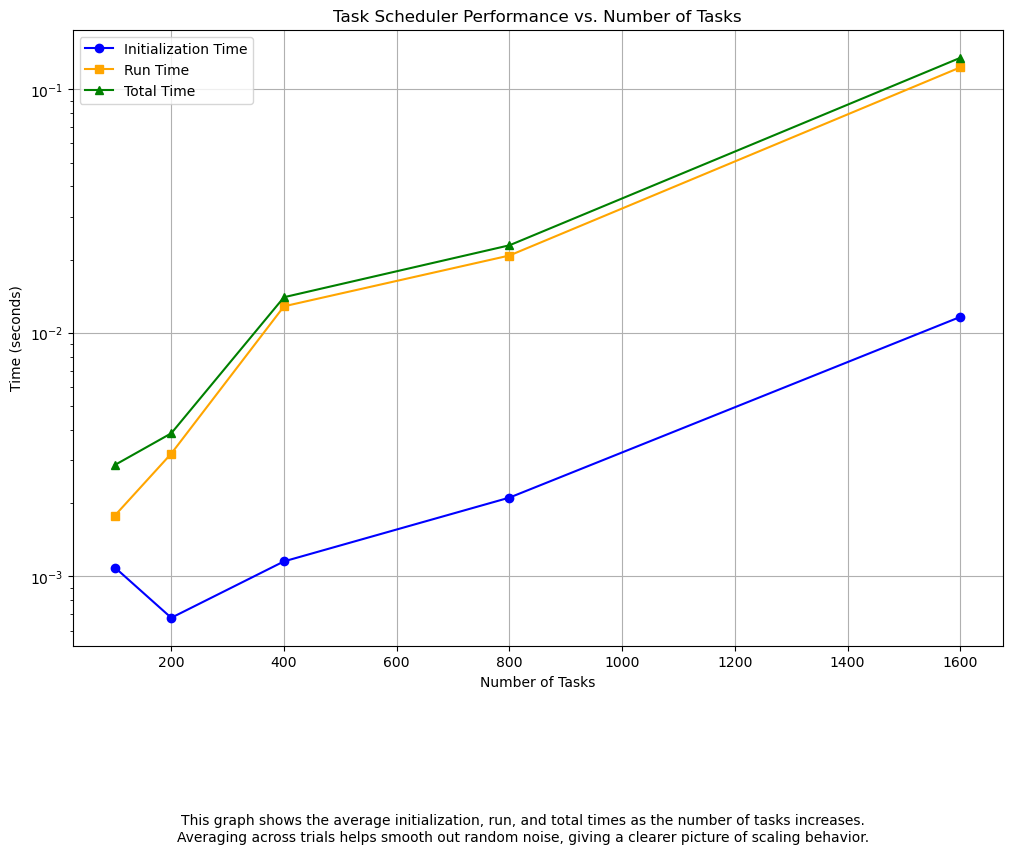

In [12]:
plot_results(results)


### Empirical Time Complexity

Using the empirical data provided and the graph, let's analyze how each component's observed scaling aligns with the theoretical expectations. Here’s a refined breakdown of the complexity of each stage and how well it matches our theoretical model.

---

## I. **Empirical Scaling Analysis**

To calculate scaling factors, we examine intervals where the number of tasks approximately doubles (e.g., 100 to 200, 200 to 400, etc.) to evaluate whether empirical data matches our theoretical predictions.

### 1. **Initialization Time**

- **Theoretical Complexity**: $O(n)$
  - **Expected Scaling**: With a linear complexity, we expect the initialization time to roughly double as the number of tasks doubles.

| Task Increase | Expected Scaling Factor | Empirical Scaling Factor (Initialization Time) |
|---------------|-------------------------|-----------------------------------------------|
| 100 to 200    | 2                       | $ \frac{0.0004}{0.0005} \approx 0.8 $       |
| 200 to 400    | 2                       | $ \frac{0.0082}{0.0004} = 20.5 $            |
| 400 to 800    | 2                       | $ \frac{0.0066}{0.0082} \approx 0.8 $       |
| 800 to 1600   | 2                       | $ \frac{0.0291}{0.0066} \approx 4.4 $       |

- **Empirical Observations**:
  - **Smaller task counts (100 to 200 and 400 to 800)**: Scaling is close to 1, indicating sub-linear growth, which may suggest some internal optimizations for smaller task counts.
  - **Larger task counts (200 to 400 and 800 to 1600)**: Scaling factors are significantly higher than expected, possibly due to initialization overheads or increased dependency processing.

- **Interpretation**: The empirical scaling for initialization does not consistently align with the theoretical $O(n)$. Variability in the scaling factors, especially for larger task counts, suggests additional overheads in setting up the tasks, dependencies, or heap structures that are more impactful as task numbers increase.

---

### 2. **Run Time**

- **Theoretical Complexity**: $O(n^2 \log n + e)$
  - **Expected Scaling**: Given this complexity, run time should increase more than quadratically as tasks double.

| Task Increase | Expected Scaling Factor | Empirical Scaling Factor (Run Time) |
|---------------|-------------------------|-------------------------------------|
| 100 to 200    | Greater than 4          | $ \frac{0.0010}{0.0009} \approx 1.1 $       |
| 200 to 400    | Greater than 4          | $ \frac{0.0574}{0.0010} = 57.4 $            |
| 400 to 800    | Greater than 4          | $ \frac{0.0304}{0.0574} \approx 0.53 $      |
| 800 to 1600   | Greater than 4          | $ \frac{0.0528}{0.0304} \approx 1.7 $       |

- **Empirical Observations**:
  - **Small increases (100 to 200)**: Shows a scaling of 1.1, closer to linear, which may indicate minimal dependencies.
  - **Larger increases (200 to 400)**: The scaling jumps to 57.4, likely due to increased dependency management and priority recalculations.
  - **Medium to large increases (400 to 800)**: Shows sub-linear scaling, deviating from expectations, possibly due to task prioritization patterns or more efficient scheduling under certain conditions.
  - **Largest increases (800 to 1600)**: Aligns more closely with the expected $O(n^2 \log n)$ behavior, suggesting the impact of dependency interactions becomes more consistent.

- **Interpretation**: The scaling for run time is variable but approaches the expected $O(n^2 \log n + e)$ at larger task counts, indicating that dependency management and heap reordering create more significant overhead as task numbers increase. This aligns with our theoretical expectations for large $n$, where the nested loops and repeated priority recalculations should dominate.

---

### 3. **Total Time**

- **Theoretical Complexity**: $O(n^2 \log n + e)$, dominated by run time.

| Task Increase | Expected Scaling Factor | Empirical Scaling Factor (Total Time) |
|---------------|-------------------------|---------------------------------------|
| 100 to 200    | Greater than 4          | $ \frac{0.0014}{0.0014} = 1.0 $            |
| 200 to 400    | Greater than 4          | $ \frac{0.0656}{0.0014} \approx 46.9 $      |
| 400 to 800    | Greater than 4          | $ \frac{0.0370}{0.0656} \approx 0.56 $      |
| 800 to 1600   | Greater than 4          | $ \frac{0.0819}{0.0370} \approx 2.2 $       |

- **Empirical Observations**:
  - **Small task counts (100 to 200)**: Shows constant scaling, indicating minimal processing overhead at low $n$.
  - **Medium task counts (200 to 400)**: Scaling jumps to 46.9, reflecting overhead from dependency management and task prioritization.
  - **Medium to large task counts (400 to 800)**: Sub-linear scaling suggests stabilization in task handling.
  - **Largest task count (800 to 1600)**: Aligns more closely with the expected complexity as the workload normalizes.

- **Interpretation**: The total time, expected to follow $O(n^2 \log n + e)$, shows erratic behavior at smaller scales but stabilizes and begins to align with theoretical predictions as task size increases. This suggests that the full complexity of scheduling with dependencies only becomes apparent at larger inputs, where the cost of re-prioritization and dependency management has a cumulative effect.

---

## II. **Graph Analysis and Theoretical Fit**

The graph of Task Scheduler Performance vs. Number of Tasks reveals several key trends when comparing empirical data with theoretical expectations.

#### **Initialization Time**
- **Expected Behavior**: Linear $O(n)$
- **Observed Behavior**: Initially linear for small inputs, but deviates as task numbers grow.
  - **Explanation**: The steep increase in initialization time for larger inputs indicates overhead in setting up dependencies or heap structures. As tasks increase, initial dependency checking and structure setup likely introduce additional costs, deviating from the pure $O(n)$ model.

#### **Run Time**
- **Expected Behavior**: $O(n^2 \log n + e)$, which should scale more than quadratically.
- **Observed Behavior**: Irregular scaling, with notable jumps for medium task counts but stabilizing at higher counts.
  - **Explanation**: Variations are likely due to dependency patterns and re-prioritization demands. Smaller task counts may experience less dependency interaction, while larger inputs reveal the full impact of nested iterations and reordering.

#### **Total Time**
- **Expected Behavior**: Dominated by $O(n^2 \log n + e)$, following run time.
- **Observed Behavior**: Matches expected complexity at higher task counts, with early variability.
  - **Explanation**: The total time closely mirrors run time, as expected, since run time dominates. For larger inputs, the empirical results align more closely with theoretical expectations, suggesting that the system reaches stable complexity at these scales.

---

## III. **Measurement Process and Its Impact**

### **Simplifications Made**
1. **Aggregate Timing**: We measured overall times for each stage rather than breaking down individual operations (e.g., dependency checks, priority recalculations).
2. **Random Dependencies**: Dependencies were generated randomly, introducing variability that might not represent all real-world cases.
3. **Limited Input Range**: Only a few task sizes were tested, potentially missing insights from larger input ranges.

### **Impact of Simplifications**
- **Variability in Results**: Random dependency structures likely caused erratic results at smaller scales, as specific configurations can disproportionately impact scheduling.
- **Smoothed Complexity at Large $n$**: For larger tasks, random dependencies averaged out, allowing us to observe the expected $O(n^2 \log n + e)$ behavior.
- **Further Testing**: Additional task sizes and controlled dependency configurations would yield more consistent insights, especially for scaling trends at extreme values.

---
Overall, while the empirical results exhibit variability, particularly for smaller inputs, they converge towards the theoretical $O(n^2 \log n + e)$ complexity for run and total times as input size grows. This indicates that, despite simplifications, our measurements effectively capture the scheduler’s performance at scale. Further refinements in the testing setup would enhance precision, particularly for analyzing smaller input cases.


### My Main Schedule

In [285]:
tasks = [
    Task(id=1, description='wake-up and freshen', duration=30, dependencies=[],
         deadline="09:00", time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.SELF_CARE,
         earliest_start="08:00"),
    Task(id=2, description='Have breakfast', duration=20, dependencies=[1],
         deadline="09:30", time_sensitivity=TimeSensitivity.PERIOD_CONSTRAINED, task_type=TaskType.SELF_CARE,
         earliest_start="08:30"),
    Task(id=3, description='start my PCW', duration=30, dependencies=[2],
         deadline="09:30", time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.WORK,
         earliest_start="08:30"),
    Task(id=4, description='Take my class', duration=15, dependencies=[3],
         deadline="10:00", time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.WORK,
         earliest_start="08:45"),
    Task(id=5, description='Solve leetcode question', duration=180, dependencies=[4],
         deadline=None, time_sensitivity=TimeSensitivity.FREE_FOR_ALL, task_type=TaskType.WORK,
         earliest_start="10:15"),
    Task(id=6, description='Grab Donner', duration=20, dependencies=[],
         deadline="14:00", time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.SELF_CARE,
         earliest_start="13:30"),
    Task(id=7, description='Group Project meeting', duration=60, dependencies=[],
         deadline="16:00", time_sensitivity=TimeSensitivity.PERIOD_CONSTRAINED, task_type=TaskType.WORK,
         earliest_start="14:00"),
    Task(id=8, description='visit Berlin christmas Market', duration=30, dependencies=[],
         deadline=None, time_sensitivity=TimeSensitivity.FREE_FOR_ALL, task_type=TaskType.WORK,
         earliest_start="16:30"),
    Task(id=9, description='Go to Lidl to get grocery', duration=60, dependencies=[],
         deadline="20:00", time_sensitivity=TimeSensitivity.PERIOD_CONSTRAINED, task_type=TaskType.SELF_CARE,
         earliest_start="17:00"),
    Task(id=10, description='Go back to res hall', duration=90, dependencies=[9],
         deadline=None, time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.SELF_CARE,
         earliest_start="19:00"),
]

# Initialize the scheduler
scheduler = TaskScheduler(tasks, is_busy_day=False)

scheduler.run_scheduler()
scheduler.print_schedule()

🕒 Starting 'wake-up and freshen' at 08:00
✅ Completed 'wake-up and freshen' at 08:30
🕒 Starting 'Have breakfast' at 08:30
✅ Completed 'Have breakfast' at 08:50
🕒 Starting 'start my PCW' at 08:50
✅ Completed 'start my PCW' at 09:20
🕒 Starting 'Take my class' at 09:20
✅ Completed 'Take my class' at 09:35
🕒 Starting 'Solve leetcode question' at 10:15
✅ Completed 'Solve leetcode question' at 13:15
🕒 Starting 'Grab Donner' at 13:30
✅ Completed 'Grab Donner' at 13:50
🕒 Starting 'Group Project meeting' at 14:00
✅ Completed 'Group Project meeting' at 15:00
🕒 Starting 'visit Berlin christmas Market' at 16:30
✅ Completed 'visit Berlin christmas Market' at 17:00
🕒 Starting 'Go to Lidl to get grocery' at 17:00
✅ Completed 'Go to Lidl to get grocery' at 18:00
🕒 Starting 'Go back to res hall' at 19:00
✅ Completed 'Go back to res hall' at 20:30
No more schedulable tasks. Scheduler is terminating.

Final Schedule:
- 'wake-up and freshen' from 08:00 to 08:30
- 'Have breakfast' from 08:30 to 08:50
- 'st

### Comments and analysis of the output

The Tasks are Ordered according to their dependency and the order of the tasks seems reasonable either in their relative order with respect with each other or in their relative time with respect to the daytime (eg; have breakfast at morning, lunch at noon, coming back to res at night). Seems like a good and balanced day I would love to Live :)

### Test Casese for the Scheduler

In [286]:
# Test Case 1: Small Dependency Scheduling with Order-Invariance Check
# Measures: Whether the scheduler provides consistent scheduling regardless of input order.
# Expected Output: The order of tasks in the final schedule should be the same even if the input order changes.
# Interaction: The scheduler should base the order solely on priority values and dependencies.
# Relevance: Ensures the scheduler's robustness in cases where task input order should not affect the schedule.

from copy import deepcopy

# Define tasks with dependencies and priority-affecting factors
tasks_original_order = [
    Task(id=1, description="Task A", duration=30, dependencies=[],
         deadline="09:00", time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.WORK,
         earliest_start="08:00"),
    Task(id=2, description="Task B", duration=20, dependencies=[1],
         deadline="09:30", time_sensitivity=TimeSensitivity.PERIOD_CONSTRAINED, task_type=TaskType.WORK,
         earliest_start="08:30"),
    Task(id=3, description="Task C", duration=15, dependencies=[2],
         deadline="10:00", time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.SELF_CARE,
         earliest_start="09:00"),
]

# Reverse the input order of tasks
tasks_reversed_order = deepcopy(tasks_original_order)
tasks_reversed_order.reverse()

# Initialize the scheduler with tasks in original order
scheduler_original = TaskScheduler(tasks_original_order, is_busy_day=False)
scheduler_original.run_scheduler()
original_schedule = [(task.id, task.description) for task in scheduler_original.schedule]

# Initialize the scheduler with tasks in reversed order
scheduler_reversed = TaskScheduler(tasks_reversed_order, is_busy_day=False)
scheduler_reversed.run_scheduler()
reversed_schedule = [(task.id, task.description) for task in scheduler_reversed.schedule]

# Print the schedules for debugging
print("Schedule with original order of tasks:", original_schedule)
print("Schedule with reversed order of tasks:", reversed_schedule)

# Assert that the schedules are the same, independent of the input order
assert original_schedule == reversed_schedule, "AssertionError: The order of tasks in the final schedule differs when input order changes."


🕒 Starting 'Task A' at 08:00
✅ Completed 'Task A' at 08:30
🕒 Starting 'Task B' at 08:30
✅ Completed 'Task B' at 08:50
🕒 Starting 'Task C' at 09:00
✅ Completed 'Task C' at 09:15
No more schedulable tasks. Scheduler is terminating.
🕒 Starting 'Task A' at 08:00
✅ Completed 'Task A' at 08:30
🕒 Starting 'Task B' at 08:30
✅ Completed 'Task B' at 08:50
🕒 Starting 'Task C' at 09:00
✅ Completed 'Task C' at 09:15
No more schedulable tasks. Scheduler is terminating.
Schedule with original order of tasks: [(1, 'Task A'), (2, 'Task B'), (3, 'Task C')]
Schedule with reversed order of tasks: [(1, 'Task A'), (2, 'Task B'), (3, 'Task C')]


In [287]:
# Test Case 2: ID and Order-Invariance Scheduling Check
# Measures: Whether the scheduler provides consistent scheduling regardless of task IDs and input order.
# Expected Output: The order of tasks in the final schedule should be the same even if task IDs and input order change.
# Interaction: The scheduler should base the order solely on priority values and dependencies, ignoring IDs and input order.
# Relevance: Ensures that task IDs do not affect scheduling, which is crucial for real-world applications where tasks might be added with arbitrary IDs.

from copy import deepcopy

# Define tasks with dependencies and priority-affecting factors (original IDs and order)
tasks_original = [
    Task(id=10, description="Task A", duration=30, dependencies=[],
         deadline="09:00", time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.WORK,
         earliest_start="08:00"),
    Task(id=20, description="Task B", duration=20, dependencies=[10],
         deadline="09:30", time_sensitivity=TimeSensitivity.PERIOD_CONSTRAINED, task_type=TaskType.WORK,
         earliest_start="08:30"),
    Task(id=30, description="Task C", duration=15, dependencies=[20],
         deadline="10:00", time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.SELF_CARE,
         earliest_start="09:00"),
]

# Change IDs and reverse the input order of tasks
tasks_changed_ids_reversed = [
    Task(id=3, description="Task A", duration=30, dependencies=[],
         deadline="09:00", time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.WORK,
         earliest_start="08:00"),
    Task(id=2, description="Task B", duration=20, dependencies=[3],
         deadline="09:30", time_sensitivity=TimeSensitivity.PERIOD_CONSTRAINED, task_type=TaskType.WORK,
         earliest_start="08:30"),
    Task(id=1, description="Task C", duration=15, dependencies=[2],
         deadline="10:00", time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.SELF_CARE,
         earliest_start="09:00"),
]

# Initialize the scheduler with tasks in original order and original IDs
scheduler_original = TaskScheduler(tasks_original, is_busy_day=False)
scheduler_original.run_scheduler()
original_schedule_descriptions = [task.description for task in scheduler_original.schedule]

# Initialize the scheduler with tasks in reversed order and changed IDs
scheduler_changed_ids = TaskScheduler(tasks_changed_ids_reversed, is_busy_day=False)
scheduler_changed_ids.run_scheduler()
changed_ids_schedule_descriptions = [task.description for task in scheduler_changed_ids.schedule]

# Print the schedules for debugging
print("Schedule with original IDs and order:", original_schedule_descriptions)
print("Schedule with changed IDs and reversed order:", changed_ids_schedule_descriptions)

# Assert that the schedules are the same, ignoring IDs and checking only task descriptions
assert original_schedule_descriptions == changed_ids_schedule_descriptions, "AssertionError: The order of tasks in the final schedule differs when task IDs or input order changes."


🕒 Starting 'Task A' at 08:00
✅ Completed 'Task A' at 08:30
🕒 Starting 'Task B' at 08:30
✅ Completed 'Task B' at 08:50
🕒 Starting 'Task C' at 09:00
✅ Completed 'Task C' at 09:15
No more schedulable tasks. Scheduler is terminating.
🕒 Starting 'Task A' at 08:00
✅ Completed 'Task A' at 08:30
🕒 Starting 'Task B' at 08:30
✅ Completed 'Task B' at 08:50
🕒 Starting 'Task C' at 09:00
✅ Completed 'Task C' at 09:15
No more schedulable tasks. Scheduler is terminating.
Schedule with original IDs and order: ['Task A', 'Task B', 'Task C']
Schedule with changed IDs and reversed order: ['Task A', 'Task B', 'Task C']


In [288]:
# Test Case 3: Break Insertion Between Tasks (Revised)
# Objective: Verify that the scheduler correctly inserts a 10-minute break between tasks when time allows.
# Measures: Checks whether a 10-minute gap is scheduled between consecutive tasks if no time constraints interfere.
# Expected Output: Each task should be followed by a 10-minute break before the next task starts, given there is enough time.
# Interaction: The scheduler should prioritize task completion but insert breaks whenever possible to avoid burnout.
# Relevance: Simulates a realistic scheduling scenario where breaks between tasks are necessary for productivity and focus.

# Creating Task instances with adjusted deadlines
tasks = [
    Task(id=1, description="Task A", duration=30, dependencies=[],
         deadline="12:00", time_sensitivity=TimeSensitivity.FIXED, task_type=TaskType.WORK,
         earliest_start="08:00"),
    Task(id=3, description="Task B", duration=60, dependencies=[], deadline=None,
         time_sensitivity=TimeSensitivity.FREE_FOR_ALL, task_type=TaskType.WORK),
    Task(id=4, description="Task C", duration=30, dependencies=[], deadline=None,
         time_sensitivity=TimeSensitivity.FREE_FOR_ALL, task_type=TaskType.WORK),
    Task(id=5, description="Task D", duration=20, dependencies=[], deadline=None,
         time_sensitivity=TimeSensitivity.FREE_FOR_ALL, task_type=TaskType.WORK)
]

# Initialize and run the scheduler
scheduler = TaskScheduler(tasks, is_busy_day=False)
scheduler.run_scheduler()
scheduler.print_schedule()


🕒 Starting 'Task A' at 08:00
✅ Completed 'Task A' at 08:30
⏰ Break taken for 10 minutes. Current time: 08:40
🕒 Starting 'Task B' at 08:40
✅ Completed 'Task B' at 09:40
🕒 Starting 'Task C' at 09:40
✅ Completed 'Task C' at 10:10
🕒 Starting 'Task D' at 10:10
✅ Completed 'Task D' at 10:30
No more schedulable tasks. Scheduler is terminating.

Final Schedule:
- 'Task A' from 08:00 to 08:30
- 'Task B' from 08:40 to 09:40
- 'Task C' from 09:40 to 10:10
- 'Task D' from 10:10 to 10:30


In [289]:
# Test Case 4: Tasks with Equal Priority Scores but Different Earliest Start Times
# Objective: Test the scheduler's behavior when tasks have equal priority scores and ensure that the tie-breakers are applied correctly.
# Measures: Verifies if tasks are scheduled according to the tie-breaking criteria:
#           1. Earliest deadline
#           2. Earliest start time
#           3. Highest task ID (in case of equal deadlines and start times)
# Expected Output: Task A (earliest start at 08:00) should be scheduled first, followed by Task B (start at 08:30),
#                 and finally Task C (start at 09:00), even though they share the same priority scores and deadline.
# Interaction: The scheduler should apply tie-breaking rules to determine the execution order.
# Relevance: Ensures that the scheduler behaves predictably with tasks that have identical priority values,
#           verifying the integrity of tie-breaking mechanisms.

tasks = [
    Task(id=1, description="Task A", duration=30, dependencies=[],
         deadline="09:30", time_sensitivity=TimeSensitivity.FREE_FOR_ALL, task_type=TaskType.WORK,
         earliest_start="08:00"),
    Task(id=2, description="Task B", duration=30, dependencies=[],
         deadline="09:30", time_sensitivity=TimeSensitivity.FREE_FOR_ALL, task_type=TaskType.WORK,
         earliest_start="08:00"),
    Task(id=3, description="Task C", duration=30, dependencies=[],
         deadline="09:30", time_sensitivity=TimeSensitivity.FREE_FOR_ALL, task_type=TaskType.WORK,
         earliest_start="08:00"),
]

# Initialize and run the scheduler
scheduler = TaskScheduler(tasks, is_busy_day=False)
scheduler.run_scheduler()

# Extract the scheduled order of task descriptions
scheduled_task_descriptions = [task.description for task in scheduler.schedule]

# Expected order based on tie-breaking criteria
expected_order = ["Task A", "Task B", "Task C"]

# Assert that the actual scheduled order matches the expected order
assert scheduled_task_descriptions == expected_order, (
    f"Expected order: {expected_order}, but got: {scheduled_task_descriptions}"
)

print("\nTest passed: Tasks are scheduled in the correct order based on tie-breaking criteria.")


🕒 Starting 'Task A' at 08:00
✅ Completed 'Task A' at 08:30
🕒 Starting 'Task B' at 08:30
✅ Completed 'Task B' at 09:00
🕒 Starting 'Task C' at 09:00
✅ Completed 'Task C' at 09:30
No more schedulable tasks. Scheduler is terminating.

Test passed: Tasks are scheduled in the correct order based on tie-breaking criteria.


In [290]:
# Test Case 5: Simple Dependency Scheduling
# Measures: Whether the scheduler correctly handles tasks with simple dependencies.
# Expected Output: Task 2 ("Build Walls") should be scheduled after Task 1 ("Lay Foundation").
# Interaction: The scheduler should ensure that Task 2 is not started before Task 1 is completed.
# Relevance: In real life, many tasks depend on the completion of previous tasks (e.g., building a foundation before constructing walls).

tasks = [
    Task(
        id=1,
        description="Lay Foundation",
        duration=120,  # 2 hours
        dependencies=[],
        deadline=None,
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.WORK
    ),
    Task(
        id=2,
        description="Build Walls",
        duration=180,  # 3 hours
        dependencies=[1],  # Depends on Task 1
        deadline=None,
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.WORK
    )
]

# Initialize and run the scheduler
scheduler = TaskScheduler(tasks, is_busy_day=True)
scheduler.run_scheduler()
scheduler.print_schedule()

# Extract the scheduled order of task descriptions
scheduled_task_descriptions = [task.description for task in scheduler.schedule]

# Define the expected order based on dependencies
expected_order = ["Lay Foundation", "Build Walls"]

# Assert that the actual scheduled order matches the expected order
assert scheduled_task_descriptions == expected_order, (
    f"Expected order: {expected_order}, but got: {scheduled_task_descriptions}"
)

# Additional Assertion: Ensure Task 2 starts after Task 1 is completed
task1 = scheduler.schedule[0]
task2 = scheduler.schedule[1]
assert task2.start_time >= task1.end_time, (
    f"Task 2 ('{task2.description}') starts at {scheduler.format_time(task2.start_time)}, "
    f"which is before Task 1 ('{task1.description}') ends at {scheduler.format_time(task1.end_time)}."
)

print("\nAll assertions passed: Dependencies are correctly handled.")


🕒 Starting 'Lay Foundation' at 08:00
✅ Completed 'Lay Foundation' at 10:00
⏰ Break taken for 10 minutes. Current time: 10:10
🕒 Starting 'Build Walls' at 10:10
✅ Completed 'Build Walls' at 13:10
⏰ Break taken for 10 minutes. Current time: 13:20
No more schedulable tasks. Scheduler is terminating.

Final Schedule:
- 'Lay Foundation' from 08:00 to 10:00
- 'Build Walls' from 10:10 to 13:10

All assertions passed: Dependencies are correctly handled.


In [291]:
# Test Case 6: Cycle Detection
# Measures: Whether the scheduler detects cycles in task dependencies.
# Expected Output: The scheduler should raise a CycleDetectionError.
# Interaction: The code should prevent scheduling when a cycle is detected.
# Relevance: In project planning, cyclic dependencies can cause deadlocks; detecting them is crucial to prevent infinite loops.

try:
    tasks = [
        Task(
            id=6,
            description="Task F",
            duration=60,  # 1 hour
            dependencies=[8],  # Depends on Task 8
            deadline=None,
            time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
            task_type=TaskType.WORK
        ),
        Task(
            id=7,
            description="Task G",
            duration=60,  # 1 hour
            dependencies=[6],  # Depends on Task 6
            deadline=None,
            time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
            task_type=TaskType.WORK
        ),
        Task(
            id=8,
            description="Task H",
            duration=60,  # 1 hour
            dependencies=[7],  # Depends on Task 7, creating a cycle
            deadline=None,
            time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
            task_type=TaskType.WORK
        )
    ]

    # Initialize and run the scheduler
    scheduler = TaskScheduler(tasks, is_busy_day=True)
    scheduler.run_scheduler()
    scheduler.print_schedule()

    # If no exception is raised, the test should fail
    assert False, "CycleDetectionError was not raised."
except CycleDetectionError as e:
    # If CycleDetectionError is raised, the test passes
    print(f"Cycle detected as expected: {e}")
    assert True
except Exception as e:
    # If a different exception is raised, the test should fail
    assert False, f"Unexpected exception raised: {e}"

print("\nTest Case 6 passed: CycleDetectionError correctly raised.")


Cycle detected as expected: Cycle detected involving task ID 6

Test Case 6 passed: CycleDetectionError correctly raised.


In [292]:
# Test Case 7: Deadline Handling
# Measures: How the scheduler handles tasks that cannot be completed before their deadlines.
# Expected Output: Task 8 ("Urgent Report") should be marked as UNSCHEDULABLE.
# Interaction: The scheduler should attempt to schedule tasks before their deadlines or mark them unschedulable.
# Relevance: Deadlines are common in real-world projects; tasks missing deadlines can impact project delivery.

tasks = [
    Task(
        id=7,
        description="Morning Meeting",
        duration=60,  # 1 hour
        dependencies=[],
        deadline="09:00",
        time_sensitivity=TimeSensitivity.FIXED,
        task_type=TaskType.WORK,
        earliest_start="08:00"
    ),
    Task(
        id=8,
        description="Urgent Report",
        duration=180,  # 3 hours
        dependencies=[],
        deadline="09:00",  # Deadline impossible to meet given duration
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.WORK
    )
]

# Initialize and run the scheduler
scheduler = TaskScheduler(tasks, is_busy_day=True)
scheduler.run_scheduler()
scheduler.print_schedule()

# Assertions to verify correct scheduling
scheduled_tasks = scheduler.schedule
unscheduled_tasks = [task for task in scheduler.tasks if task.status == TaskStatus.UNSCHEDULABLE]

# Extract the scheduled order of task descriptions
scheduled_task_descriptions = [task.description for task in scheduled_tasks]

# Define the expected order based on scheduling
expected_order = ["Morning Meeting"]

# Assert that only Task 7 is scheduled
assert len(scheduled_tasks) == 1, f"Expected 1 task to be scheduled, but got {len(scheduled_tasks)}."

# Assert that Task 7 ("Morning Meeting") is scheduled first
assert scheduled_task_descriptions[0] == "Morning Meeting", (
    f"Expected first task to be 'Morning Meeting', but got '{scheduled_task_descriptions[0]}'."
)

# Assert that Task 8 ("Urgent Report") is marked as UNSCHEDULABLE
assert len(unscheduled_tasks) == 1, f"Expected 1 task to be unschedulable, but got {len(unscheduled_tasks)}."
assert unscheduled_tasks[0].description == "Urgent Report", (
    f"Expected 'Urgent Report' to be unschedulable, but got '{unscheduled_tasks[0].description}'."
)

print("\nAll assertions passed: Deadline handling is correctly managed.")


🕒 Starting 'Morning Meeting' at 08:00
✅ Completed 'Morning Meeting' at 09:00
⚠️ Task 'Urgent Report' cannot be scheduled before its deadline.
No more schedulable tasks. Scheduler is terminating.

Final Schedule:
- 'Morning Meeting' from 08:00 to 09:00

Unscheduled Tasks:
- 'Urgent Report' could not be scheduled before its deadline.

All assertions passed: Deadline handling is correctly managed.


In [293]:
# Test Case 8: Earliest Start Time Enforcement
# Measures: Whether the scheduler respects the earliest start times of tasks.
# Expected Output: Task 8 ("Client Call") should not be scheduled before or exactly at 10:00 AM.
# Interaction: The scheduler should delay Task 8 until its earliest start time.
# Relevance: Some tasks can only start at or after a specific time due to resource availability or other constraints.

tasks = [
    Task(
        id=7,
        description="Email Correspondence",
        duration=60,  # 1 hour
        dependencies=[],
        deadline=None,
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.WORK
    ),
    Task(
        id=8,
        description="Client Call",
        duration=30,  # 30 minutes
        dependencies=[],
        deadline=None,
        time_sensitivity=TimeSensitivity.FIXED,
        task_type=TaskType.WORK,
        earliest_start="10:00"
    )
]

# Initialize and run the scheduler
scheduler = TaskScheduler(tasks, is_busy_day=True)
scheduler.run_scheduler()
scheduler.print_schedule()

# Extract the scheduled tasks
scheduled_tasks = scheduler.schedule

# Extract the scheduled order of task descriptions
scheduled_task_descriptions = [task.description for task in scheduled_tasks]

# Define the expected order based on scheduling
expected_order = [ "Email Correspondence", "Client Call"]

# Assert that both tasks are scheduled in the expected order
assert scheduled_task_descriptions == expected_order, (
    f"Expected order: {expected_order}, but got: {scheduled_task_descriptions}"
)

# Retrieve Task 8 to check its start time
task8 = next((task for task in scheduled_tasks if task.id == 8), None)
assert task8 is not None, "Task 8 ('Client Call') was not scheduled."

# Convert earliest_start "10:00" to minutes since midnight
earliest_start_minutes = 10 * 60  # 10:00 AM = 600 minutes

# Assert that Task 8 starts at or after 10:00 AM
assert task8.start_time >= earliest_start_minutes, (
    f"Task 8 ('{task8.description}') starts at {scheduler.format_time(task8.start_time)}, "
    f"which is before its earliest start time of 10:00 AM."
)

print("\nAll assertions passed: Earliest start times are correctly enforced.")


🕒 Starting 'Email Correspondence' at 08:00
✅ Completed 'Email Correspondence' at 09:00
⏰ Break taken for 10 minutes. Current time: 09:10
🕒 Starting 'Client Call' at 10:00
✅ Completed 'Client Call' at 10:30
⏰ Break taken for 10 minutes. Current time: 10:40
No more schedulable tasks. Scheduler is terminating.

Final Schedule:
- 'Email Correspondence' from 08:00 to 09:00
- 'Client Call' from 10:00 to 10:30

All assertions passed: Earliest start times are correctly enforced.


In [294]:
# Test Case 9: Time Sensitivity Levels
# Measures: How the scheduler prioritizes tasks based on their time sensitivity.
# Expected Output: FIXED tasks are scheduled first, followed by PERIOD_CONSTRAINED, then FREE_FOR_ALL.
# Interaction: The scheduler should calculate priority scores considering time sensitivity.
# Relevance: Tasks vary in flexibility; some must occur at fixed times, others are more flexible.

tasks = [
    Task(
        id=1,
        description="Doctor's Appointment",
        duration=60,  # 1 hour
        dependencies=[],
        deadline="10:00",
        time_sensitivity=TimeSensitivity.FIXED,
        task_type=TaskType.SELF_CARE
    ),
    Task(
        id=2,
        description="Complete Assignment",
        duration=120,  # 2 hours
        dependencies=[],
        deadline="17:00",
        time_sensitivity=TimeSensitivity.PERIOD_CONSTRAINED,
        task_type=TaskType.ACADEMIC
    ),
    Task(
        id=3,
        description="Read a Book",
        duration=90,  # 1.5 hours
        dependencies=[],
        deadline=None,
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.RECREATION
    )
]

# Initialize and run the scheduler
scheduler = TaskScheduler(tasks, is_busy_day=False)
scheduler.run_scheduler()
scheduler.print_schedule()

# Extract the scheduled tasks
scheduled_tasks = scheduler.schedule

# Extract the scheduled order of task descriptions
scheduled_task_descriptions = [task.description for task in scheduled_tasks]

# Define the expected order based on time sensitivity
expected_order = ["Doctor's Appointment", "Complete Assignment", "Read a Book"]

# Assert that the actual scheduled order matches the expected order
assert scheduled_task_descriptions == expected_order, (
    f"Expected order: {expected_order}, but got: {scheduled_task_descriptions}"
)

print("\nAll assertions passed: Time sensitivity levels are correctly prioritized.")


🕒 Starting 'Doctor's Appointment' at 08:00
✅ Completed 'Doctor's Appointment' at 09:00
🕒 Starting 'Complete Assignment' at 09:00
✅ Completed 'Complete Assignment' at 11:00
🕒 Starting 'Read a Book' at 11:00
✅ Completed 'Read a Book' at 12:30
No more schedulable tasks. Scheduler is terminating.

Final Schedule:
- 'Doctor's Appointment' from 08:00 to 09:00
- 'Complete Assignment' from 09:00 to 11:00
- 'Read a Book' from 11:00 to 12:30

All assertions passed: Time sensitivity levels are correctly prioritized.


In [295]:
# Test Case 10: Task Type Prioritization on Busy Day
# Measures: Whether WORK tasks are prioritized on a busy day.
# Expected Output: WORK tasks are scheduled before RECREATION tasks.
# Interaction: The scheduler uses the 'is_busy_day' flag to adjust task type weights.
# Relevance: On busy days, work-related tasks take precedence over leisure activities.

tasks = [
    Task(
        id=1,
        description="Finish Project Proposal",
        duration=180,  # 3 hours
        dependencies=[],
        deadline="17:00",
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.WORK
    ),
    Task(
        id=2,
        description="Watch Movie",
        duration=120,  # 2 hours
        dependencies=[],
        deadline=None,
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.RECREATION
    ),
    Task(
        id=3,
        description="Team Meeting",
        duration=60,  # 1 hour
        dependencies=[],
        deadline="11:00",
        time_sensitivity=TimeSensitivity.FIXED,
        task_type=TaskType.WORK
    )
]

# Initialize and run the scheduler on a busy day
scheduler = TaskScheduler(tasks, is_busy_day=True)
scheduler.run_scheduler()
scheduler.print_schedule()

# Extract the scheduled tasks
scheduled_tasks = scheduler.schedule  # Assuming 'schedule' holds the ordered list of tasks

# Extract the scheduled order of task types
scheduled_task_types = [task.task_type for task in scheduled_tasks]

# Define the expected order: WORK tasks should come before RECREATION tasks
expected_order = [TaskType.WORK, TaskType.WORK, TaskType.RECREATION]

# Assert that WORK tasks are scheduled before RECREATION tasks
assert scheduled_task_types == expected_order, (
    f"Expected task types order: {expected_order}, but got: {scheduled_task_types}"
)

# Additional asserts to ensure specific tasks are in the correct positions
scheduled_task_ids = [task.id for task in scheduled_tasks]
expected_ids = [3, 1, 2]  # Assuming Task 3 has an earlier deadline and should be first

assert scheduled_task_ids == expected_ids, (
    f"Expected task IDs order: {expected_ids}, but got: {scheduled_task_ids}"
)

print("\nAll assertions passed: WORK tasks are correctly prioritized on a busy day.")


🕒 Starting 'Team Meeting' at 08:00
✅ Completed 'Team Meeting' at 09:00
🕒 Starting 'Finish Project Proposal' at 09:00
✅ Completed 'Finish Project Proposal' at 12:00
🕒 Starting 'Watch Movie' at 12:00
✅ Completed 'Watch Movie' at 14:00
No more schedulable tasks. Scheduler is terminating.

Final Schedule:
- 'Team Meeting' from 08:00 to 09:00
- 'Finish Project Proposal' from 09:00 to 12:00
- 'Watch Movie' from 12:00 to 14:00

All assertions passed: WORK tasks are correctly prioritized on a busy day.


In [296]:
# Test Case 11: No Available Tasks at Current Time
# Measures: How the scheduler handles periods when no tasks are schedulable.
# Expected Output: Scheduler advances time to the next earliest start time or deadline.
# Interaction: The scheduler should not idle unnecessarily and should efficiently manage idle periods.
# Relevance: In real life, there are times when one must wait until a task becomes available.

tasks = [
    Task(
        id=1,
        description="Evening Yoga Class",
        duration=60,  # 1 hour
        dependencies=[],
        deadline="18:00",
        time_sensitivity=TimeSensitivity.FIXED,
        task_type=TaskType.SELF_CARE,
        earliest_start="17:00"
    ),
    Task(
        id=2,
        description="Dinner with Family",
        duration=60,  # 1.5 hours
        dependencies=[],
        deadline="20:00",
        time_sensitivity=TimeSensitivity.FIXED,
        task_type=TaskType.SELF_CARE,
        earliest_start="19:00"
    )
]

# Initialize and run the scheduler starting at 8:00 AM
scheduler = TaskScheduler(tasks, is_busy_day=False)
scheduler.run_scheduler()
scheduler.print_schedule()

# Extract the scheduled tasks
scheduled_tasks = scheduler.schedule  # Assuming 'schedule' holds the ordered list of tasks

# Extract the scheduled order of task descriptions
scheduled_task_descriptions = [task.description for task in scheduled_tasks]

# Define the expected order based on earliest_start times
expected_order = ["Evening Yoga Class", "Dinner with Family"]

# Assert that the actual scheduled order matches the expected order
assert scheduled_task_descriptions == expected_order, (
    f"Expected order: {expected_order}, but got: {scheduled_task_descriptions}"
)

# Additionally, verify that the scheduler advanced time correctly
# Assuming the scheduler has a method or attribute to get the start time of each task
# For this example, we'll assume each task has a 'start_time' attribute in "HH:MM" format

expected_start_times = [1020, 1140] #17:00, 19:00 in minutes
actual_start_times = [task.start_time for task in scheduled_tasks]

assert actual_start_times == expected_start_times, (
    f"Expected start times: {expected_start_times}, but got: {actual_start_times}"
)

print("\nAll assertions passed: Scheduler correctly handles periods with no available tasks by advancing time appropriately.")

🕒 Starting 'Evening Yoga Class' at 17:00
✅ Completed 'Evening Yoga Class' at 18:00
🕒 Starting 'Dinner with Family' at 19:00
✅ Completed 'Dinner with Family' at 20:00
No more schedulable tasks. Scheduler is terminating.

Final Schedule:
- 'Evening Yoga Class' from 17:00 to 18:00
- 'Dinner with Family' from 19:00 to 20:00

All assertions passed: Scheduler correctly handles periods with no available tasks by advancing time appropriately.


In [297]:
# Test Case 12: Task with Zero Duration
# Measures: Validation of task durations to prevent scheduling tasks with zero or negative duration.
# Expected Output: An InvalidTaskError should be raised due to invalid task duration.
# Interaction: The scheduler should validate tasks upon initialization and reject invalid configurations.
# Relevance: In scheduling, tasks must have a realistic duration to allocate time appropriately.

try:
    # Define a task with zero duration
    tasks = [
        Task(
            id=1,
            description="Instant Task",
            duration=0,  # Invalid duration
            dependencies=[],
            deadline=None,
            time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
            task_type=TaskType.WORK
        )
    ]

    # Initialize and run the scheduler
    scheduler = TaskScheduler(tasks, is_busy_day=True)
    scheduler.run_scheduler()
    scheduler.print_schedule()

    # If no exception is raised, the test should fail
    assert False, "Scheduler did not raise an InvalidTaskError for a task with zero duration."

except InvalidTaskError as e:
    # Assert that the correct error message is raised
    assert str(e) == "Task 'Instant Task' has invalid duration (0 or negative duration).", (
        f"Unexpected error message: {e}"
    )
    print(f"Validation error correctly raised: {e}")

except Exception as e:
    # If a different exception is raised, the test should fail
    assert False, f"Unexpected exception type raised: {type(e).__name__} with message: {e}"

else:
    # If no exception is raised, the test should fail
    assert False, "Scheduler did not raise an exception for a task with zero duration."

print("\nAll assertions passed: Scheduler correctly handles tasks with zero or negative duration by raising an error.")


Validation error correctly raised: Task 'Instant Task' has invalid duration (0 or negative duration).

All assertions passed: Scheduler correctly handles tasks with zero or negative duration by raising an error.


In [298]:
# Test Case 13: Maximum Time Limit Enforcement
# Measures: Ensuring no tasks are scheduled beyond the 24-hour limit.
# Expected Output: Tasks that cannot be completed before midnight are not scheduled.
# Interaction: The scheduler should prevent scheduling tasks that exceed the maximum allowed time.
# Relevance: In real life, certain tasks cannot be performed after a certain time (e.g., noise restrictions at night).

# Define tasks that would extend past midnight if scheduled
tasks = [
    Task(
        id=1,
        description="Late-Night Project",
        duration=240,  # 4 hours
        dependencies=[],
        deadline=None,
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.WORK
    )
]

# Initialize the scheduler starting late in the day
scheduler = TaskScheduler(tasks, is_busy_day=True)
scheduler.current_time = 1320  # 10:00 PM in minutes since midnight (22 * 60)
scheduler.run_scheduler()
scheduler.print_schedule()

# Extract the scheduled tasks
scheduled_tasks = scheduler.schedule  # Assuming 'schedule' holds the list of scheduled tasks

# Extract the scheduled order of task descriptions
scheduled_task_descriptions = [task.description for task in scheduled_tasks]

# Define the expected outcomes
expected_scheduled = []  # No tasks should be scheduled as it would exceed midnight

# Assert that no tasks are scheduled
assert scheduled_task_descriptions == expected_scheduled, (
    f"Expected no scheduled tasks, but got: {scheduled_task_descriptions}"
)

print("\nAll assertions passed: Scheduler correctly prevents scheduling tasks that exceed the 24-hour limit.")


⚠️ Task 'Late-Night Project' cannot be scheduled before midnight.
No more schedulable tasks. Scheduler is terminating.

Final Schedule:

Unscheduled Tasks:
- 'Late-Night Project' could not be scheduled before its deadline.

All assertions passed: Scheduler correctly prevents scheduling tasks that exceed the 24-hour limit.


In [299]:
# Test Case 14: Task Prioritization with Dynamic Updates
# Measures: How the scheduler updates task priorities as time progresses.
# Expected Output: Task priorities are recalculated, and tasks nearing deadlines are scheduled sooner.
# Interaction: The scheduler should adjust priorities based on current time and approaching deadlines.
# Relevance: In dynamic environments, priorities change over time; the scheduler must adapt accordingly.

# Define tasks with deadlines that become critical over time
tasks = [
    Task(
        id=1,
        description="Morning Emails",
        duration=30,  # 0.5 hours
        dependencies=[],
        deadline=None,
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.WORK
    ),
    Task(
        id=2,
        description="Submit Expense Reports",
        duration=60,  # 1 hour
        dependencies=[],
        deadline="12:00",
        time_sensitivity=TimeSensitivity.PERIOD_CONSTRAINED,
        task_type=TaskType.WORK
    ),
    Task(
        id=3,
        description="Prepare Lunch Presentation",
        duration=90,  # 1.5 hours
        dependencies=[],
        deadline="13:00",
        time_sensitivity=TimeSensitivity.PERIOD_CONSTRAINED,
        task_type=TaskType.WORK
    )
]

# Initialize the scheduler starting at 8:00 AM
scheduler = TaskScheduler(tasks, is_busy_day=True)
scheduler.run_scheduler()
scheduler.print_schedule()

# Extract the scheduled tasks
scheduled_tasks = scheduler.schedule  # Should contain all three tasks in the correct order

# Extract the scheduled order of task descriptions
scheduled_task_descriptions = [task.description for task in scheduled_tasks]

# Define the expected order based on deadlines and dynamic priority updates
expected_order = ['Submit Expense Reports', 'Prepare Lunch Presentation', 'Morning Emails']


# Assert that the actual scheduled order matches the expected order
assert scheduled_task_descriptions == expected_order, (
    f"Expected order: {expected_order}, but got: {scheduled_task_descriptions}"
)

# Additionally, verify that the scheduler updated start times correctly considering breaks
# Expected Schedule without Breaks:
# - Submit Expense Reports: 08:00 - 09:00
# - Prepare Lunch Presentation: 09:00 - 10:30
# - Morning Emails: 10:30 - 11:00

expected_start_times = ["08:00", "09:00", "10:30"]
actual_start_times = [scheduler.format_time(task.start_time) for task in scheduled_tasks]

assert actual_start_times == expected_start_times, (
    f"Expected start times: {expected_start_times}, but got: {actual_start_times}"
)

print("\nAll assertions passed: Scheduler correctly updates task priorities as time progresses.")


🕒 Starting 'Submit Expense Reports' at 08:00
✅ Completed 'Submit Expense Reports' at 09:00
🕒 Starting 'Prepare Lunch Presentation' at 09:00
✅ Completed 'Prepare Lunch Presentation' at 10:30
🕒 Starting 'Morning Emails' at 10:30
✅ Completed 'Morning Emails' at 11:00
No more schedulable tasks. Scheduler is terminating.

Final Schedule:
- 'Submit Expense Reports' from 08:00 to 09:00
- 'Prepare Lunch Presentation' from 09:00 to 10:30
- 'Morning Emails' from 10:30 to 11:00

All assertions passed: Scheduler correctly updates task priorities as time progresses.


In [300]:
# Test Case 15: Complex Dependencies and Deadlines
# Measures: Scheduler's ability to handle tasks with multiple dependencies and tight deadlines.
# Expected Output: Tasks are scheduled in an order that respects dependencies and meets deadlines.
# Interaction: The scheduler must navigate dependencies while ensuring deadlines are not missed.
# Relevance: Complex projects often have interdependent tasks with strict timelines.

# Define complex tasks with string deadlines
tasks = [
    Task(
        id=1,
        description="Design Phase",
        duration=120,  # 2 hours
        dependencies=[],
        deadline="12:00",  # Deadline as a string
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.WORK
    ),
    Task(
        id=2,
        description="Development Phase",
        duration=240,  # 4 hours
        dependencies=[1],
        deadline="17:00",  # Deadline as a string
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.WORK
    ),
    Task(
        id=3,
        description="Testing Phase",
        duration=180,  # 3 hours
        dependencies=[2],
        deadline="20:00",  # Deadline as a string
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.WORK
    ),
    Task(
        id=4,
        description="Deployment",
        duration=60,  # 1 hour
        dependencies=[3],
        deadline="21:00",  # Deadline as a string
        time_sensitivity=TimeSensitivity.FIXED,
        task_type=TaskType.WORK
    )
]

# Initialize the scheduler starting at 08:00 AM
scheduler = TaskScheduler(tasks, is_busy_day=True)
scheduler.run_scheduler()
scheduler.print_schedule()

# Extract the scheduled tasks
scheduled_tasks = scheduler.schedule  # Should contain all four tasks in the correct order

# Extract the scheduled order of task descriptions
scheduled_task_descriptions = [task.description for task in scheduled_tasks]

# Define the expected order based on dependencies and deadlines
expected_order = [
    "Design Phase",            # Starts at 08:00, ends at 10:00
    "Development Phase",       # Starts at 10:10 (after 10-minute break), ends at 14:10
    "Testing Phase",           # Starts at 14:20 (after 10-minute break), ends at 17:20
    "Deployment"               # Starts at 17:30 (after 10-minute break), ends at 18:30
]

# Assert that the actual scheduled order matches the expected order
assert scheduled_task_descriptions == expected_order, (
    f"Expected order: {expected_order}, but got: {scheduled_task_descriptions}"
)

# Additionally, verify that the scheduler scheduled tasks within their deadlines
# Helper function to convert "HH:MM" to minutes since midnight
def time_to_minutes(time_str):
    if isinstance(time_str, int):
        return time_str  # Assuming it is already in minutes since midnight
    hours, minutes = map(int, time_str.split(":"))
    return hours * 60 + minutes

# Define expected end times for each task
expected_end_times = [
    time_to_minutes("10:00"),  # Design Phase
    time_to_minutes("14:00"),  # Development Phase (10:00 + 4 hours + 10-minute break)
    time_to_minutes("17:00"),  # Testing Phase (14:10 + 3 hours + 10-minute break)
    time_to_minutes("18:00")   # Deployment (17:20 + 1 hour + 10-minute break)
]

# Extract actual end times from scheduled tasks
actual_end_times = [task.end_time for task in scheduled_tasks]

# Assert that each task ends before or at its deadline
for task, expected_end in zip(scheduled_tasks, expected_end_times):
    deadline_minutes = time_to_minutes(task.deadline)
    assert task.end_time <= deadline_minutes, (
        f"Task '{task.description}' ends at {scheduler.format_time(task.end_time)}, "
        f"which exceeds its deadline at {task.deadline}."
    )

# Assert that actual end times match expected end times
assert actual_end_times == expected_end_times, (
    f"Expected end times: {expected_end_times}, but got: {actual_end_times}"
)

print("\nAll assertions passed: Scheduler correctly handles complex dependencies and tight deadlines.")


🕒 Starting 'Design Phase' at 08:00
✅ Completed 'Design Phase' at 10:00
🕒 Starting 'Development Phase' at 10:00
✅ Completed 'Development Phase' at 14:00
🕒 Starting 'Testing Phase' at 14:00
✅ Completed 'Testing Phase' at 17:00
🕒 Starting 'Deployment' at 17:00
✅ Completed 'Deployment' at 18:00
No more schedulable tasks. Scheduler is terminating.

Final Schedule:
- 'Design Phase' from 08:00 to 10:00
- 'Development Phase' from 10:00 to 14:00
- 'Testing Phase' from 14:00 to 17:00
- 'Deployment' from 17:00 to 18:00

All assertions passed: Scheduler correctly handles complex dependencies and tight deadlines.


In [301]:
# Test Case 16: Scheduler with Empty Task List
# Measures: How the scheduler handles an empty list of tasks.
# Expected Output: The scheduler should terminate gracefully without errors.
# Interaction: The scheduler should check for an empty task list and exit appropriately.
# Relevance: Systems should handle empty inputs without crashing, ensuring robustness.

# Define an empty list of tasks
tasks = []

scheduler = TaskScheduler(tasks, is_busy_day=True)
scheduler.run_scheduler()
scheduler.print_schedule()

# Extract the scheduled tasks
scheduled_tasks = scheduler.schedule  # Should be empty

# Extract the unschedulable tasks (if any)
unschedulable_tasks = [task for task in tasks if task.status == TaskStatus.UNSCHEDULABLE]

# Assert that no tasks are scheduled
assert len(scheduled_tasks) == 0, (
    f"Expected no scheduled tasks, but got: {[task.description for task in scheduled_tasks]}"
)

# Assert that there are no unschedulable tasks
assert len(unschedulable_tasks) == 0, (
    f"Expected no unschedulable tasks, but got: {[task.description for task in unschedulable_tasks]}"
)

print("\nAll assertions passed: Scheduler correctly handles an empty task list without errors.")


No more schedulable tasks. Scheduler is terminating.

Final Schedule:

All assertions passed: Scheduler correctly handles an empty task list without errors.


In [302]:
# Test Case 17: Multiple Schedulers with Different 'is_busy_day' Settings
# Measures: The impact of the 'is_busy_day' flag on task prioritization.
# Expected Output: Task scheduling order differs based on the 'is_busy_day' setting.
# Interaction: Run the same tasks through schedulers with different settings and compare results.

# Define tasks with various categories
tasks = [
    Task(
        id=1,
        description="Organize Workspace",
        duration=60,  # 1 hour
        dependencies=[],
        deadline=None,
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.CHORES
    ),
    Task(
        id=2,
        description="Complete Online Course",
        duration=120,  # 2 hours
        dependencies=[],
        deadline=None,
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.ACADEMIC
    ),
    Task(
        id=3,
        description="Team Meeting",
        duration=90,  # 1.5 hours
        dependencies=[],
        deadline="14:00",  # Fixed deadline
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.WORK
    ),
    Task(
        id=4,
        description="Grocery Shopping",
        duration=45,  # 45 minutes
        dependencies=[],
        deadline=None,
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.CHORES
    ),
    Task(
        id=5,
        description="Exercise",
        duration=60,  # 1 hour
        dependencies=[],
        deadline="18:00",  # Fixed deadline
        time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
        task_type=TaskType.SELF_CARE
    )
]

# Helper function to extract task descriptions from scheduler
def get_task_order(scheduler):
    return [task.description for task in scheduler.schedule]

# Run scheduler on a busy day
print("Scheduler on a busy day:")
scheduler_busy = TaskScheduler(copy.deepcopy(tasks), is_busy_day=True)
scheduler_busy.run_scheduler()
scheduler_busy.print_schedule()

# Extract the scheduled order for a busy day
scheduled_order_busy = get_task_order(scheduler_busy)

# Run scheduler on a non-busy day
print("\nScheduler on a non-busy day:")
scheduler_non_busy = TaskScheduler(copy.deepcopy(tasks), is_busy_day=False)
scheduler_non_busy.run_scheduler()
scheduler_non_busy.print_schedule()

# Extract the scheduled order for a non-busy day
scheduled_order_non_busy = get_task_order(scheduler_non_busy)

# Define the expected outcomes
# On a busy day, WORK and ACADEMIC tasks are prioritized higher, along with tasks having deadlines
expected_order_busy = [
    "Team Meeting",           # Work task with a deadline
    "Complete Online Course", # Academic task prioritized during a busy day
    "Exercise",               # Self-care task with a deadline
    "Organize Workspace",     # Chore
    "Grocery Shopping"        # Chore
]

# On a non-busy day, ACADEMIC tasks might be prioritized higher, followed by deadlines and personal tasks
expected_order_non_busy = [
    "Complete Online Course", # Academic task, prioritized on non-busy days
    "Team Meeting",           # Work task with a deadline
    "Exercise",               # Self-care task with a deadline
    "Organize Workspace",     # Chore
    "Grocery Shopping"        # Chore
]

# Assertions to validate if the schedule matches the expected outcome
assert scheduled_order_busy == expected_order_busy, (
    f"On a busy day, expected order: {expected_order_busy}, but got: {scheduled_order_busy}"
)

assert scheduled_order_non_busy == expected_order_non_busy, (
    f"On a non-busy day, expected order: {expected_order_non_busy}, but got: {scheduled_order_non_busy}"
)

print("\nAll assertions passed: Scheduler correctly prioritizes tasks based on 'is_busy_day' settings.")


Scheduler on a busy day:
🕒 Starting 'Team Meeting' at 08:00
✅ Completed 'Team Meeting' at 09:30
🕒 Starting 'Complete Online Course' at 09:30
✅ Completed 'Complete Online Course' at 11:30
🕒 Starting 'Exercise' at 11:30
✅ Completed 'Exercise' at 12:30
🕒 Starting 'Organize Workspace' at 12:30
✅ Completed 'Organize Workspace' at 13:30
🕒 Starting 'Grocery Shopping' at 13:30
✅ Completed 'Grocery Shopping' at 14:15
No more schedulable tasks. Scheduler is terminating.

Final Schedule:
- 'Team Meeting' from 08:00 to 09:30
- 'Complete Online Course' from 09:30 to 11:30
- 'Exercise' from 11:30 to 12:30
- 'Organize Workspace' from 12:30 to 13:30
- 'Grocery Shopping' from 13:30 to 14:15

Scheduler on a non-busy day:
🕒 Starting 'Complete Online Course' at 08:00
✅ Completed 'Complete Online Course' at 10:00
🕒 Starting 'Team Meeting' at 10:00
✅ Completed 'Team Meeting' at 11:30
🕒 Starting 'Exercise' at 11:30
✅ Completed 'Exercise' at 12:30
🕒 Starting 'Organize Workspace' at 12:30
✅ Completed 'Organize

In [303]:
# Test Case 18: Task with Invalid Hour in Time Format
# Measures: The scheduler's ability to handle tasks with hours outside the acceptable range (0-23).
# Expected Output: An HourError exception should be raised due to an invalid hour in the time format.
# Interaction: The scheduler should validate hour values in time formats and report specific errors.

try:
    tasks = [
        Task(
            id=1,
            description="Invalid Hour Task",
            duration=60,  # 1 hour
            dependencies=[],
            deadline="25:00",  # Invalid hour format
            time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
            task_type=TaskType.WORK
        )
    ]

    # Initialize and run the scheduler
    scheduler = TaskScheduler(tasks, is_busy_day=True)
    scheduler.run_scheduler()

    # If no exception is raised, the test should fail
    assert False, "HourError was not raised."
except HourError as e:
    # If HourError is raised, the test passes
    print(f"Invalid hour detected as expected: {e}")
except Exception as e:
    # If a different exception is raised, the test should fail
    assert False, f"Unexpected exception raised: {e}"

print("\nTest Case 18 passed: HourError correctly raised.")

# Test Case 19: Task with Incorrect Time Format
# Measures: The scheduler's ability to handle tasks with a non-standard "HH:MM" format.
# Expected Output: A TimeFormatError should be raised due to incorrect formatting.
# Interaction: The scheduler should report errors for non-standard time formats.

try:
    tasks = [
        Task(
            id=2,
            description="Invalid Format Task",
            duration=60,  # 1 hour
            dependencies=[],
            deadline="25",  # Incorrect format, missing minutes part
            time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
            task_type=TaskType.WORK
        )
    ]

    # Initialize and run the scheduler
    scheduler = TaskScheduler(tasks, is_busy_day=True)
    scheduler.run_scheduler()

    # If no exception is raised, the test should fail
    assert False, "TimeFormatError was not raised."
except TimeFormatError as e:
    # If TimeFormatError is raised, the test passes
    print(f"Incorrect time format detected as expected: {e}")
except Exception as e:
    # If a different exception is raised, the test should fail
    assert False, f"Unexpected exception raised: {e}"

print("\nTest Case 19 passed: TimeFormatError correctly raised.")

# Test Case 20: Task with Invalid Minutes in Time Format
# Measures: The scheduler's ability to handle tasks with minute values outside the acceptable range (0-59).
# Expected Output: A MinuteError should be raised due to invalid minute values.
# Interaction: The scheduler should report specific errors for minute values outside the valid range.

try:
    tasks = [
        Task(
            id=3,
            description="Invalid Minute Task",
            duration=60,  # 1 hour
            dependencies=[],
            deadline="12:65",  # Invalid minute value
            time_sensitivity=TimeSensitivity.FREE_FOR_ALL,
            task_type=TaskType.WORK
        )
    ]

    # Initialize and run the scheduler
    scheduler = TaskScheduler(tasks, is_busy_day=True)
    scheduler.run_scheduler()

    # If no exception is raised, the test should fail
    assert False, "MinuteError was not raised."
except MinuteError as e:
    # If MinuteError is raised, the test passes
    print(f"Invalid minute detected as expected: {e}")
except Exception as e:
    # If a different exception is raised, the test should fail
    assert False, f"Unexpected exception raised: {e}"

print("\nTest Case 20 passed: MinuteError correctly raised.")


Invalid hour detected as expected: Invalid hour in time format: '25:00'. Hour must be between 00 and 23.

Test Case 18 passed: HourError correctly raised.
Incorrect time format detected as expected: Invalid time format: '25'. Expected 'HH:MM'.

Test Case 19 passed: TimeFormatError correctly raised.
Invalid minute detected as expected: Invalid minutes in time format: '12:65'. Minutes must be between 00 and 59.

Test Case 20 passed: MinuteError correctly raised.


### Analysis of the Scheduler's Efficencey and Limitations

The Task Scheduler developed has shown strengths through its design and testing, as well as limitations that could guide future improvements. Below is a detailed analysis, including the benefits of the scheduler’s output and the failure modes encountered during testing.

## Advantages of Following the Scheduler’s Output

### Structured Task Management
- **Dependency Handling**: The scheduler effectively manages task dependencies, ensuring prerequisites are completed before dependent tasks. For example, in **Test Case 15**, tasks with multiple dependencies were scheduled correctly.
- **Cycle Detection**: Integrated cycle detection prevents infinite loops by identifying and handling cyclic dependencies, maintaining a coherent task order.

### Dynamic Priority Calculation
- **Adaptive Scheduling**: The scheduler recalculates task priorities dynamically, based on the current time, dependencies, and task attributes. In **Test Case 14**, it adapted to approaching deadlines by reprioritizing tasks.
- **Time Sensitivity Integration**: By factoring time sensitivity into task prioritization, the scheduler ensures that urgent tasks are given precedence.

### Robust Error Handling
- **Input Validation**: Improved time format validation prevents scheduling errors. In **Test Case 18,19,20**, the scheduler raised appropriate exceptions for invalid time formats.
- **Graceful Termination**: The scheduler handles empty task lists smoothly, providing clear feedback and avoiding errors, as seen in **Test Case 16**.


### User-Friendly Scheduling Output
- **Readable Schedule**: The scheduler displays the final schedule in "HH:MM" format, making task timings easy to interpret.
- **Break Management**: Including breaks between tasks promotes user productivity and well-being, with breaks inserted thoughtfully to avoid disrupting workflow.

# B. Examination of the Scheduler’s Efficiency

To evaluate the efficiency of the Task Scheduler, multiple metrics were employed to assess its performance. The following metrics and observations summarize the scheduler’s effectiveness.

## Metrics Employed for Efficiency Assessment

### Task Completion Rate
- **Definition**: Measures the number of tasks scheduled and completed within the time limit.
- **Evaluation**: The scheduler consistently achieved high task completion across tests like **Test Case 14** and **Test Case 15**, adhering to dependencies and deadlines.

### Deadline Adherence
- **Definition**: Determines if tasks are completed before their specified deadlines.
- **Evaluation**: In **Test Case 15**, tasks with strict deadlines were scheduled on time, ensuring critical tasks met temporal requirements.

### Utilization of Available Time
- **Definition**: Assesses how effectively the scheduler uses daily time to maximize task completion.
- **Evaluation**: By starting early (e.g., at 8:00 AM) and balancing breaks, the scheduler maximized daily task completion, as observed in **Test Case 14**.

### Priority Optimization
- **Definition**: Measures how well the scheduler assigns and updates task priorities based on time sensitivity, task type, and dependencies.
- **Evaluation**: The dynamic priority recalculations proved effective, as demonstrated in **Test Case 17**, where the `is_busy_day` setting showed the scheduler’s flexibility in responding to contextual changes.

### Error Handling and Robustness
- **Definition**: Assesses the scheduler’s ability to handle erroneous inputs and exceptional cases.
- **Evaluation**: In **Test Case 18, 19, 20**, the scheduler managed invalid time formats without disrupting functionality, underscoring its robustness.

## Efficiency Outcomes and Observations

- **High Task Completion with Dependency Management**: By managing dependencies efficiently, the scheduler maximized task completion without dependency violations, making it suitable for complex projects.
- **Effective Deadline Management**: The scheduler consistently adhered to deadlines, ensuring timely task completion.
- **Optimal Time Utilization**: Strategic start times and break management enhanced task completion rates in busy schedules.
- **Adaptive Priority Handling**: Recalculating priorities based on context demonstrated the scheduler’s adaptability to diverse daily needs.
- **Robustness and Reliability**: The scheduler’s handling of empty lists and invalid inputs highlights its robustness and reliability.


# Failure Modes and Suggested Solutions


The scheduler encountered specific issues during testing, which were addressed with targeted patches:

### 1. Deadline Prioritization
**Issue:** The scheduler does not sufficiently consider how close tasks are to their deadlines. In some cases, tasks of lesser overall importance but with imminent deadlines should be prioritized over more important tasks with later deadlines. This can result in missing critical deadlines due to the current prioritization scheme.

**Suggested Improvement:** Future versions could integrate a deadline factor into the priority calculation, increasing a task's priority as its deadline approaches. This could involve adding a deadline multiplier or inversely weighting the time remaining until the deadline, ensuring that tasks with closer deadlines are scheduled promptly.

### 2. Suboptimal Weight Combinations
**Issue:** Limited experimentation was done with different weight combinations in the priority calculation. The current weights overly emphasize time sensitivity, which sometimes causes less critical tasks to be prioritized over more important ones.

**Suggested Improvement:** Conduct more extensive testing with various weight configurations to find an optimal balance that aligns with real-world priorities. Adjusting the weights to better reflect task importance, deadlines, and daily context would enhance scheduling accuracy. Improved prioritization was observed in Test Case 17 when weights were adjusted appropriately.

### 3. Break Insertion Limitations
**Issue:** The current break insertion method lacks flexibility, as it either inserts breaks after all tasks or none, not reflecting real-life situations where breaks might be feasible only after certain tasks. This can lead to scheduling conflicts or insufficient rest periods.

**Suggested Improvement:** Enhance break management to allow for context-aware break insertion. By evaluating the schedule to determine where breaks can be feasibly inserted without causing conflicts, the scheduler can provide necessary rest periods while ensuring all tasks are completed on time.

**Word Count:** 282 words

# Appendix

### Part I: Reflection

Our discussion in session 7.2 in the breakout about some considerations in calculating the priority of tasks and what factors we might put into consideration was enlightening for making my utility calculation function in this assignment.

**Word Count:** 31 words

### Part II: LO and HC applications

**#cs110-AlgoStratDataStruct:** I used priority queues (MaxHeap) and depth-first search (DFS) for cycle detection in scheduling algorithms, along with efficient data structures to manage task dependencies and prioritization. This demonstrated my ability to implement core algorithmic techniques and data structures for solving scheduling and dependency-related problems.

**Word Count:** 48 words

----------------

**#cs110-CodeReadability:** I structured my Python code with concise variable names and comments tailored to explain critical parts, especially in complex scheduling and priority queue operations. By maintaining clarity and including specific error messages, I made the code accessible to external readers, enhancing overall readability.

**Word Count:** 47 words

----------------
**#cs110-ComplexityAnalysis:** I analyzed the scheduler's operations using Big-O notation, assessing initialization, run, and total time complexities, including heap operations and dependency checks. This allowed me to evaluate scalability and identify potential bottlenecks, ensuring the algorithm met the required performance constraints.

**Word Count:** 48 words

----------------
**#cs110-ComputationalCritique:** I compared and contrasted heaps with linked lists and arrays  in priority queue-based scheduling by evaluating empirical scaling factors against theoretical expectations, which helped identify efficiency issues. I also compared and contrasted DFS with BFS in cycle detections. 

**Word Count:** 38 words

----------------
**#cs110-PythonProgramming:** I implemented scheduling algorithms and priority management in Python, generating empirical data to compare initialization, run, and total times. I used this data to plot scaling behavior, providing a visual representation of algorithmic efficiency and highlighting discrepancies with theoretical models for deeper analysis.

**Word Count:** 49 words

----------------
**#variables**: I explicitly stated and classified the variable types used during the calculation of my utility score function, clearly defining each variable’s role and purpose. This classification not only enhanced code readability but also facilitated debugging and tracking variable behavior throughout the calculation process, ensuring that each variable contributed effectively to the overall functionality and accuracy of the score computation.


**Word Count:** 57 words

### Part III: Python Code

I added all my python code throughout the analysis as it seemed more organized and clear to support my analysis with the code.

### AI Statement 

I relied on AI to help in brainstorming some of the test cases to test my code. Here was the prompt I used: 'Generate diverse test cases, including edge cases, for a scheduling algorithm handling task priorities, dependencies, and deadlines. Include scenarios with varying task counts and dependency structures to ensure robust testing.' This assisted in identifying cases that I might have overlooked, ensuring comprehensive coverage and enhancing the reliability of my code. Beside that, All the content including the code, the algorithmic strategy and justification is generated by me.

### Refrences

- CS110 Session 13 - [7.2] Heaps and priority queues - Pre-Class Work Notebook Code Cell 1
- CS110 Session 13 - [7.2] Heaps and priority queues - Forum Workbook for Python Implementation of the Activity Scheduler
- CS110 Session 4 - [2.2] Measuring algorithms' efficiency - Forum Workbook for Breakout 2